In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# EDA (exploratory data analysis)

### Информация о датасетах

In [232]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
test_ids = test["ID"].copy()

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

### Пропуски в данных

In [233]:
train.isna().sum()

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

### Информация по каждому признаку

In [234]:
train.describe()

Age   AnnualIncome  CreditScore     LoanAmount  LoanDuration  \
count  10487.000000   10487.000000  9986.000000    9986.000000  10487.000000   
mean      39.850386  131587.872127   678.082716   29874.218306     53.439878   
std       11.614132  115791.941909   175.192486   27705.509722     24.493562   
min       18.000000   15000.000000   300.000000    1063.000000     12.000000   
25%       32.000000   20959.500000   550.000000   12658.000000     36.000000   
50%       40.000000   89015.000000   722.500000   21828.500000     48.000000   
75%       48.000000  257025.000000   850.000000   37158.000000     60.000000   
max       80.000000  748508.000000   850.000000  418997.000000    120.000000   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
count        10487.000000          9986.000000               10487.000000   
mean             1.568323           546.458642                   0.284397   
std              1.418684           501.981888                   0.159240   
min              0.000000            13.000000                   0.003674   
25%              0.000000           233.250000                   0.158929   
50%              1.000000           398.000000                   0.262229   
75%              3.000000           685.000000                   0.391683   
max              6.000000         10879.000000                   0.914635   

       NumberOfOpenCreditLines  NumberOfCreditInquiries  ...  \
count             10487.000000             10487.000000  ...   
mean                  3.033565                 0.979498  ...   
std                   1.740186                 0.990927  ...   
min                   0.000000                 0.000000  ...   
25%                   2.000000                 0.000000  ...   
50%                   3.000000                 1.000000  ...   
75%                   4.000000                 2.000000  ...   
max                  12.000000                 6.000000  ...   

       UtilityBillsPaymentHistory     JobTenure    Experience      NetWorth  \
count                10487.000000  10487.000000  10487.000000  9.986000e+03   
mean                     0.784428      4.949271     17.628302  1.542381e+05   
std                      0.123039      2.201100     11.337248  4.622229e+05   
min                      0.259301      0.000000      0.000000  1.004000e+03   
25%                      0.708475      3.000000      9.000000  7.252500e+03   
50%                      0.803692      5.000000     17.000000  2.742950e+04   
75%                      0.879312      6.000000     26.000000  1.241758e+05   
max                      0.996573     17.000000     57.000000  1.126117e+07   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count       9986.000000  10487.000000        10487.000000   
mean           0.200392      0.200112         1075.622426   
std            0.094388      0.096458         1344.053181   
min            0.052494      0.046445           30.008506   
25%            0.119908      0.119548          375.872620   
50%            0.182023      0.180710          684.878529   
75%            0.264709      0.264880         1279.930203   
max            0.722497      0.833647        29634.807816   

       TotalDebtToIncomeRatio  LoanApproved     RiskScore  
count            10487.000000  10487.000000  1.048700e+04  
mean                 0.517577      0.511776 -2.569878e+04  
std                  0.894637      0.499885  1.431675e+06  
min                  0.006064      0.000000 -9.999999e+06  
25%                  0.066734      0.000000  3.256475e+01  
50%                  0.178193      1.000000  4.411876e+01  
75%                  0.637457      1.000000  6.535690e+01  
max                 24.383046      1.000000  1.000000e+07  

[8 rows x 30 columns]

### Распределение целевой переменной — RiskScore

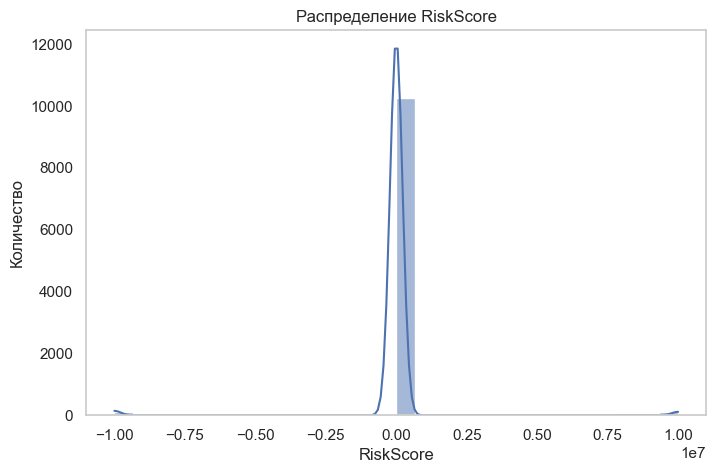

In [235]:
plt.figure(figsize=(8, 5))
sns.histplot(train["RiskScore"], bins=30, kde=True)
plt.title("Распределение RiskScore")
plt.xlabel("RiskScore")
plt.ylabel("Количество")
plt.grid()
plt.show()

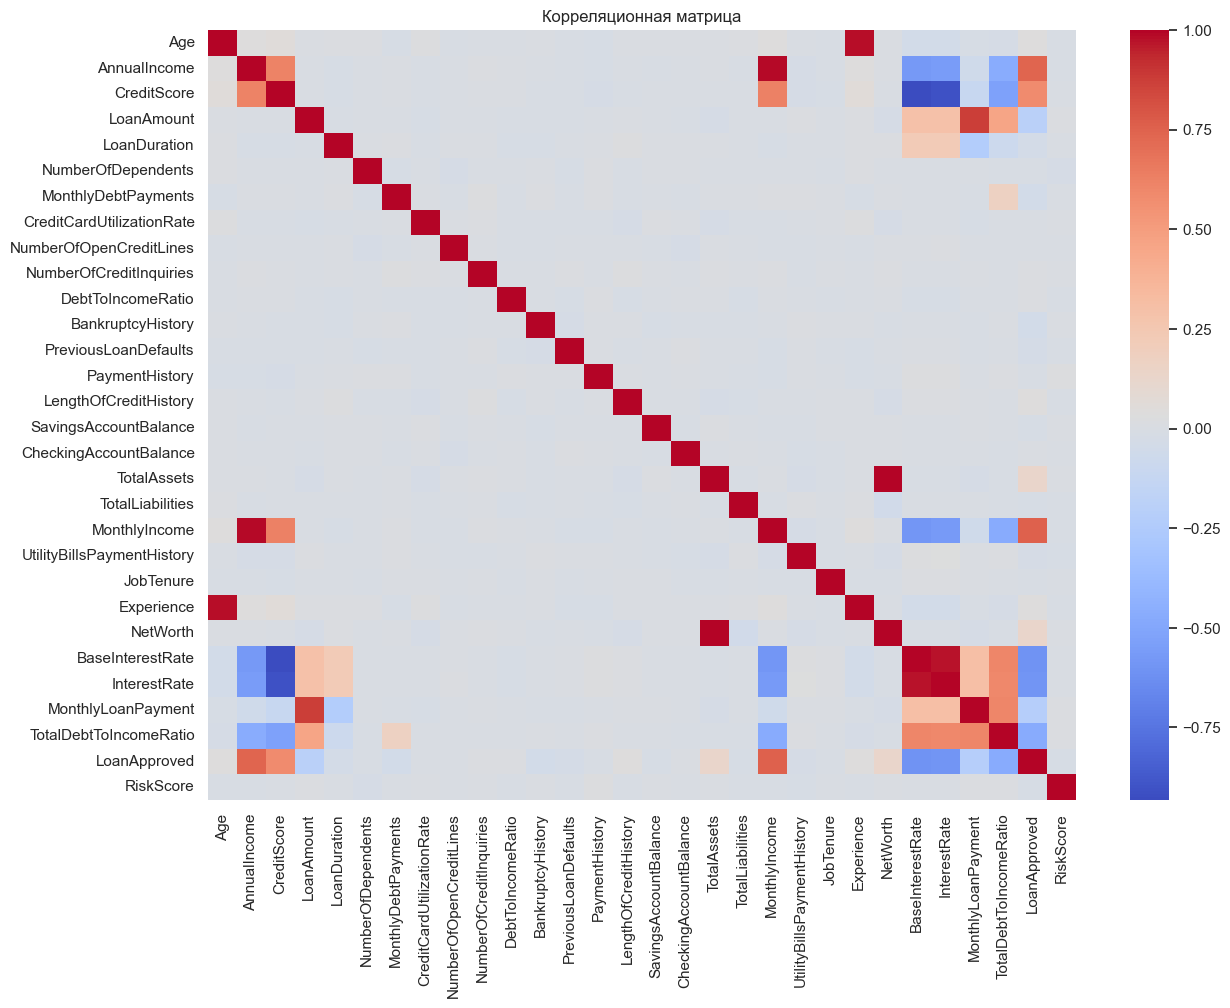

In [236]:
plt.figure(figsize=(14, 10))
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

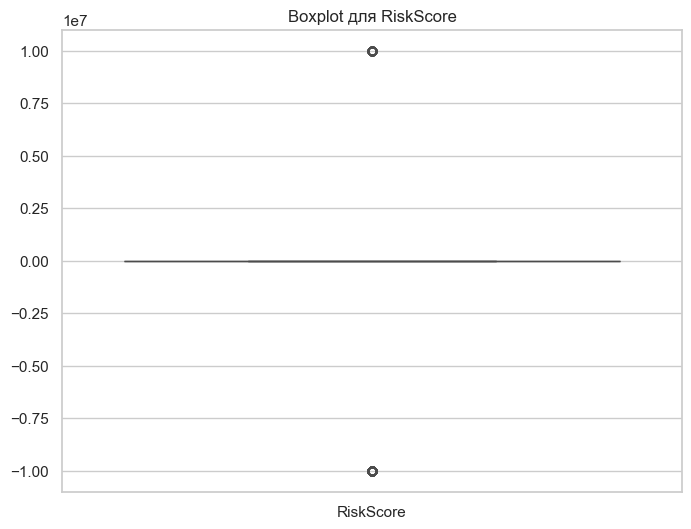

In [237]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train[['RiskScore']])
plt.title("Boxplot для RiskScore")
plt.show()

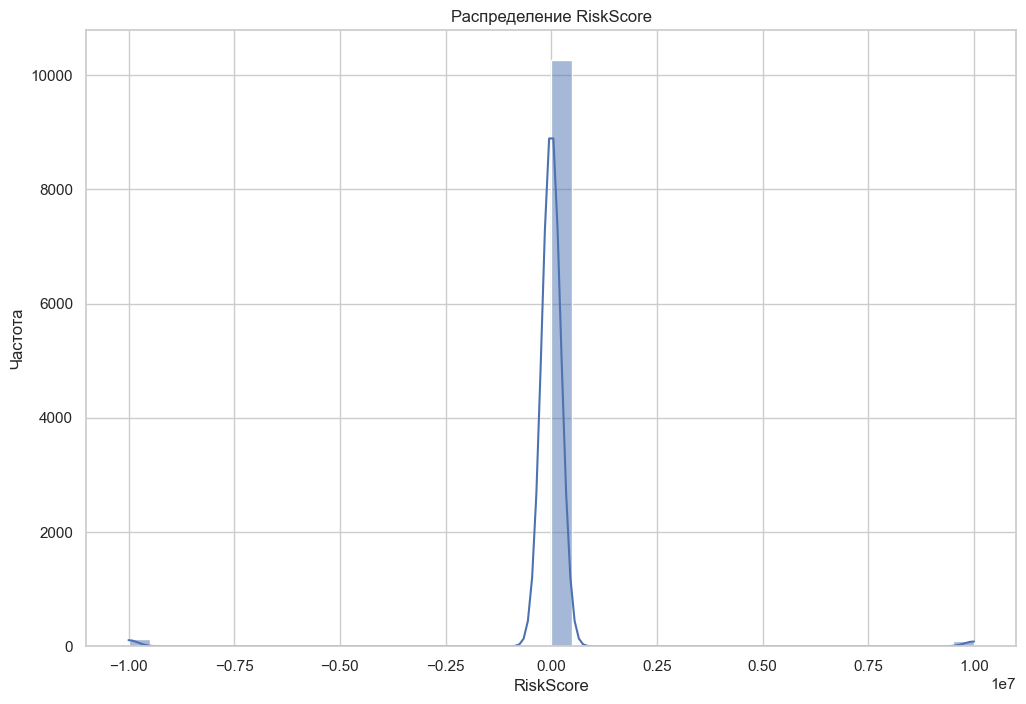

In [238]:

plt.figure(figsize=(12, 8))
sns.histplot(train['RiskScore'], bins=40, kde=True)
plt.title("Распределение RiskScore")
plt.xlabel("RiskScore")
plt.ylabel("Частота")
plt.show()

### Scatter-плоты между важными признаками

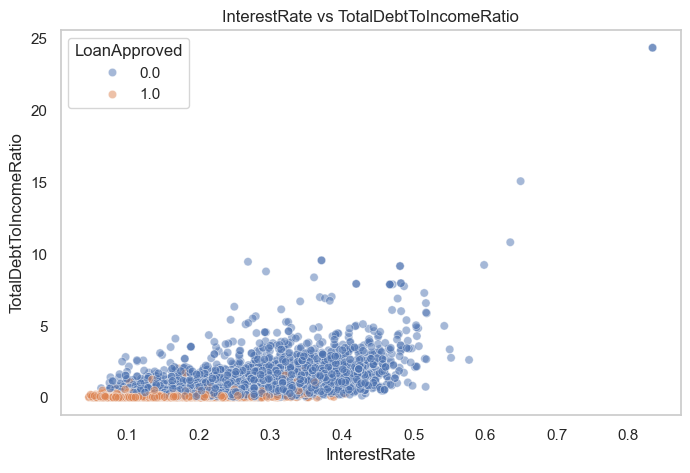

In [239]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="InterestRate", y="TotalDebtToIncomeRatio", hue="LoanApproved", data=train, alpha=0.5)
plt.title("InterestRate vs TotalDebtToIncomeRatio")
plt.grid()
plt.show()

### Boxplot: AnnualIncome vs LoanApproved
Статистика одобренных кредитов по уровню дохода

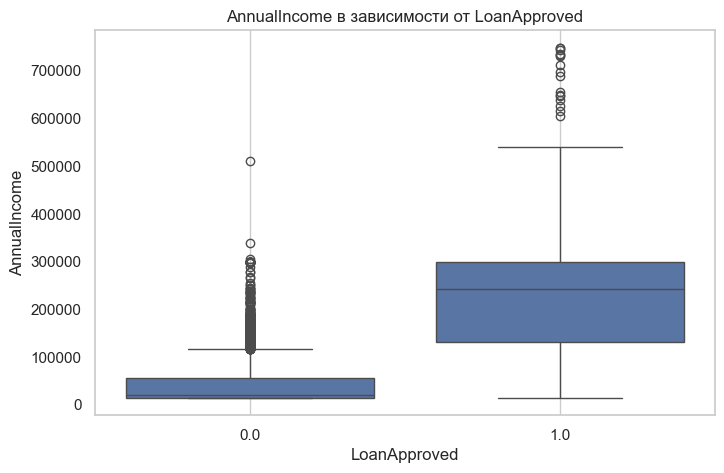

In [240]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="LoanApproved", y="AnnualIncome", data=train)
plt.title("AnnualIncome в зависимости от LoanApproved")
plt.grid()
plt.show()


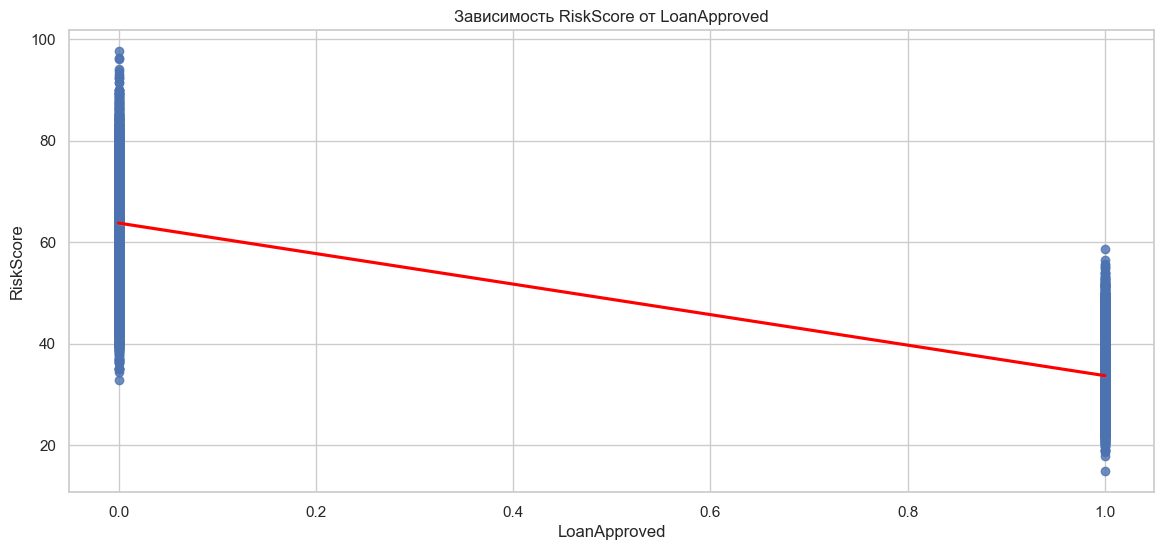

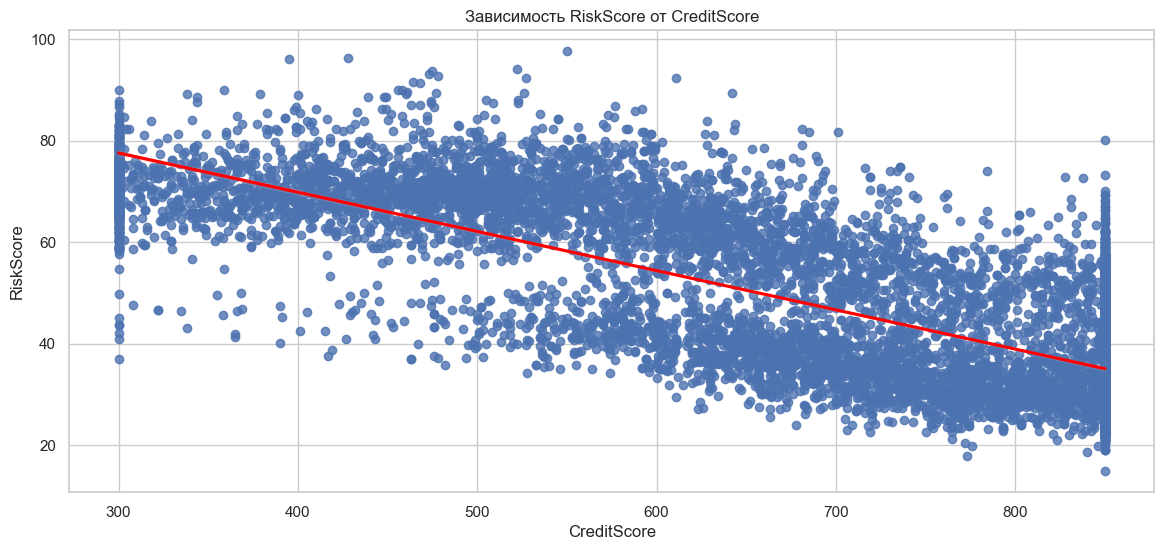

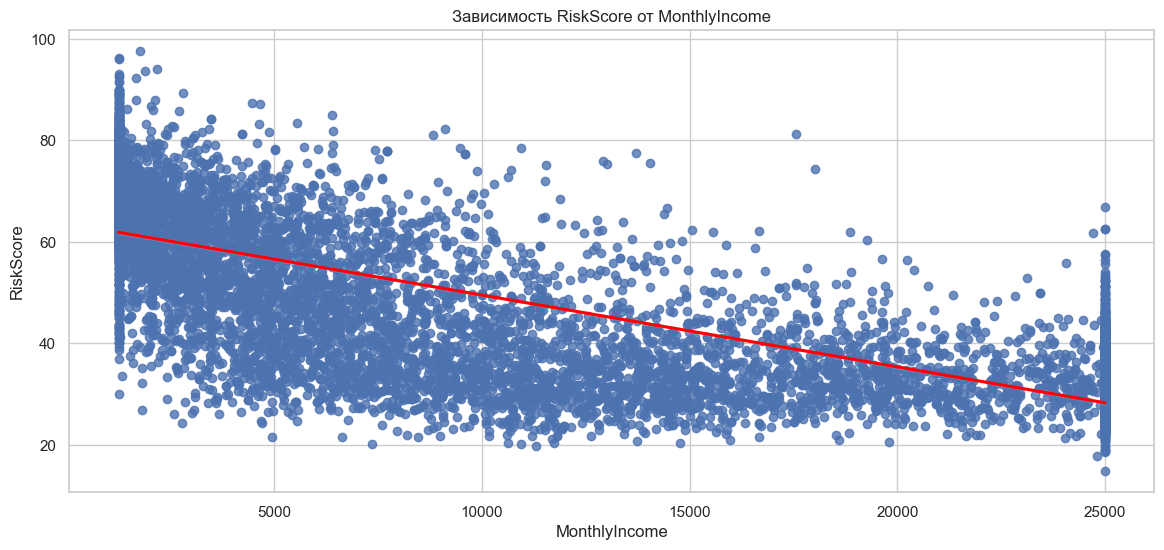

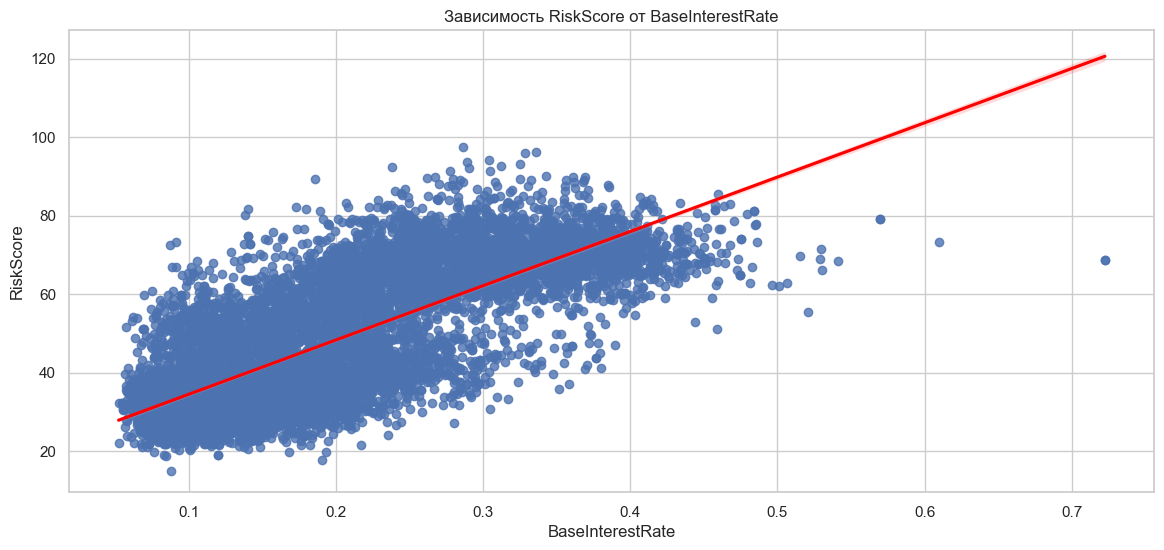

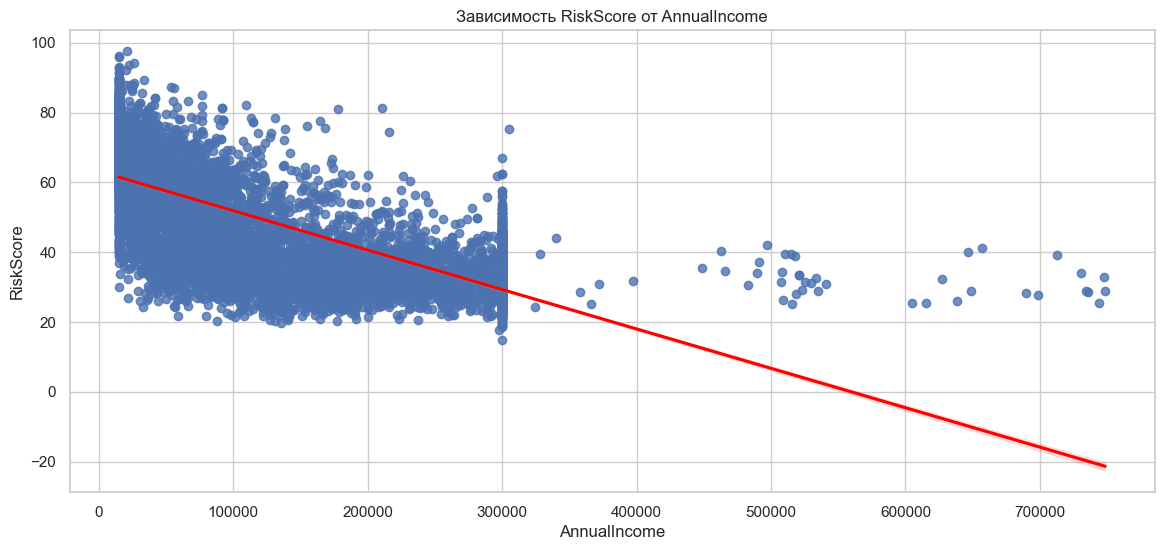

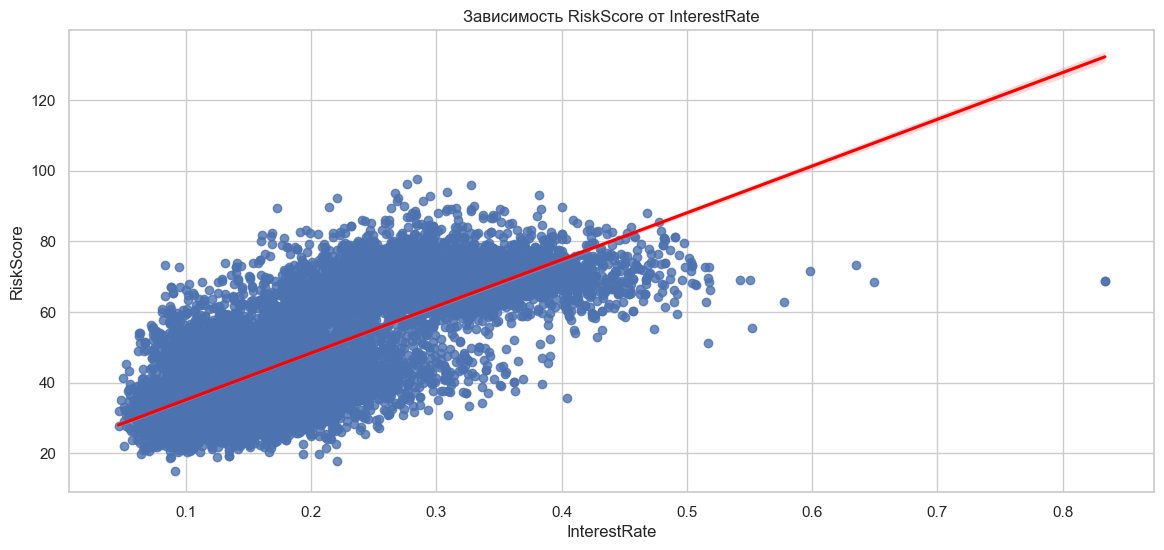

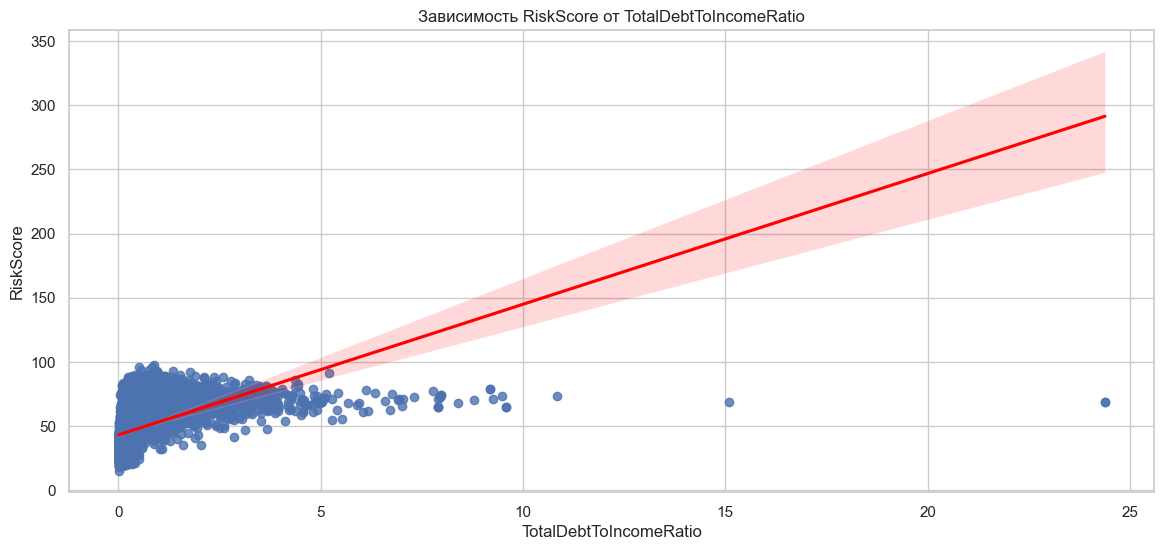

In [241]:
features = ["LoanApproved", "CreditScore", "MonthlyIncome", "BaseInterestRate", "AnnualIncome", "InterestRate", "TotalDebtToIncomeRatio"]

train = train[(train["RiskScore"] >= 0) & (train["RiskScore"] < 100)]
for feature in features :
    plt.figure(figsize=(14, 6))
    sns.regplot(x=feature, y="RiskScore", data=train, line_kws={"color": "red"}) 
    plt.title(f"Зависимость RiskScore от {feature}")
    plt.show()

# Подготовка данных

### Убираем строки с пустыми значениями

In [242]:
none_values = train.isna().sum()
none_percent = (none_values / len(train)) * 100

print(none_percent)

train_without_none = train.dropna()
train_filled = train.copy()

num_features = train_filled.select_dtypes(include="number").columns
train_filled[num_features] = train_filled[num_features].fillna(train_filled[num_features].mean())

categorial_features = train_filled.select_dtypes("object").columns
for col in categorial_features:
    train_filled[col] = train_filled[col].fillna(train_filled[col].mode()[0])

pre_df = train_without_none.copy()
pre_test = test.copy()

ApplicationDate               0.000000
Age                           0.000000
AnnualIncome                  0.000000
CreditScore                   4.721573
LoanAmount                    4.721573
LoanDuration                  0.000000
MaritalStatus                 0.000000
NumberOfDependents            0.000000
HomeOwnershipStatus           0.000000
MonthlyDebtPayments           4.721573
CreditCardUtilizationRate     0.000000
NumberOfOpenCreditLines       0.000000
NumberOfCreditInquiries       0.000000
DebtToIncomeRatio             0.000000
BankruptcyHistory             4.721573
LoanPurpose                   4.721573
PreviousLoanDefaults          0.000000
PaymentHistory                0.000000
LengthOfCreditHistory         0.000000
SavingsAccountBalance         0.000000
CheckingAccountBalance        4.721573
TotalAssets                   4.721573
TotalLiabilities              0.000000
MonthlyIncome                 0.000000
UtilityBillsPaymentHistory    0.000000
JobTenure                

### Преобразование категориальных признаков в числовые

In [243]:
education_order = ['Doctorate', 'Master', 'Bachelor', 'Associate', 'High School']
education_mapping = {level: idx for idx, level in enumerate(education_order)}

employment_order = ['Employed', 'Self-Employed', 'Unemployed']
employment_mapping = {status: idx for idx, status in enumerate(employment_order)}

home_ownership_order = ['Own', 'Mortgage', 'Rent', 'Other']
home_ownership_mapping = {status: idx for idx, status in enumerate(home_ownership_order)}

for df in [pre_df, pre_test]:
    df['EducationLevel_num'] = df['EducationLevel'].map(education_mapping)
    df['EmploymentStatus_num'] = df['EmploymentStatus'].map(employment_mapping)
    df['HomeOwnershipStatus_num'] = df['HomeOwnershipStatus'].map(home_ownership_mapping)

# Применяем One-Hot Encoding к номинальным признакам с помощью pandas get_dummies
nominal_cols = ['MaritalStatus', 'LoanPurpose']

for col in nominal_cols:
    for df in [train, test]:
        dummies = pd.get_dummies(df[col], prefix=col)
        df.drop(columns=[col], inplace=True)
        df[dummies.columns] = dummies

for df in [train, test]:
    bool_columns = df.select_dtypes(include='bool').columns
    df[bool_columns] = df[bool_columns].astype(int)


### Поставим флаги для частых значений

In [244]:
# MonthlyIncome
print(pre_df['MonthlyIncome'].value_counts().head(10))
pre_df['MonthlyIncome_Is1250'] = (pre_df['MonthlyIncome'] == 1250).astype(int)
pre_df['MonthlyIncome_Is25000'] = (pre_df['MonthlyIncome'] == 25000).astype(int)
pre_test['MonthlyIncome_Is1250'] = (pre_test['MonthlyIncome'] == 1250).astype(int)
pre_test['MonthlyIncome_Is25000'] = (pre_test['MonthlyIncome'] == 25000).astype(int)

MonthlyIncome
1250.000000     2222
25000.000000    2124
4838.000000        3
1367.333333        3
3540.666667        3
3623.583333        3
13860.833333       3
1921.416667        3
11996.666667       3
4746.416667        3
Name: count, dtype: int64


In [245]:
# AnnualIncome
print(df['AnnualIncome'].value_counts().head(10)) 
pre_df['AnnualIncome_Is15000'] = (pre_df['AnnualIncome'] == 15000).astype(int)
pre_df['AnnualIncome_Is300000'] = (pre_df['AnnualIncome'] == 300000).astype(int)
pre_test['AnnualIncome_Is15000'] = (pre_test['AnnualIncome'] == 15000).astype(int)
pre_test['AnnualIncome_Is300000'] = (pre_test['AnnualIncome'] == 300000).astype(int)

AnnualIncome
15000     1103
300000    1086
54722        2
255036       2
172325       2
264072       2
254151       2
31512        2
56148        2
54557        2
Name: count, dtype: int64


In [246]:
# CreditScore
for score in [850, 300]:
    pre_df[f'CreditScore_Is{score}'] = (pre_df['CreditScore'] == score).astype(int)
    pre_test[f'CreditScore_Is{score}'] = (pre_test['CreditScore'] == score).astype(int)

for func, name in [(np.log1p, 'Log'), (np.sqrt, 'Sqrt'), (np.cbrt, 'Cbrt')]:
    pre_df[f'CreditScore_{name}'] = func(train['CreditScore'])
    pre_test[f'CreditScore_{name}'] = func(test['CreditScore'])

for power in [2, 3]:
    pre_df[f'CreditScore_sq{power}'] = pre_df['CreditScore'] ** power
    pre_test[f'CreditScore_sq{power}'] = pre_test['CreditScore'] ** power

pre_df['CreditScore_AnnualIncome'] = pre_df['CreditScore'] * train['AnnualIncome']
pre_test['CreditScore_AnnualIncome'] = pre_test['CreditScore'] * test['AnnualIncome']

for power, suffix in [(0.5, '05'), (2, '2'), (3, '3')]:
    pre_df[f'CreditScore_AnnualIncome{suffix}'] = pre_df['CreditScore_AnnualIncome'] ** power
    pre_test[f'CreditScore_AnnualIncome{suffix}'] = pre_test['CreditScore_AnnualIncome'] ** power

# Учитываем долговую нагрузку
pre_df['CreditScore_DTI'] = pre_df['CreditScore'] / (pre_df['TotalDebtToIncomeRatio'] + 1)
pre_test['CreditScore_DTI'] = pre_test['CreditScore'] / (pre_test['TotalDebtToIncomeRatio'] + 1)

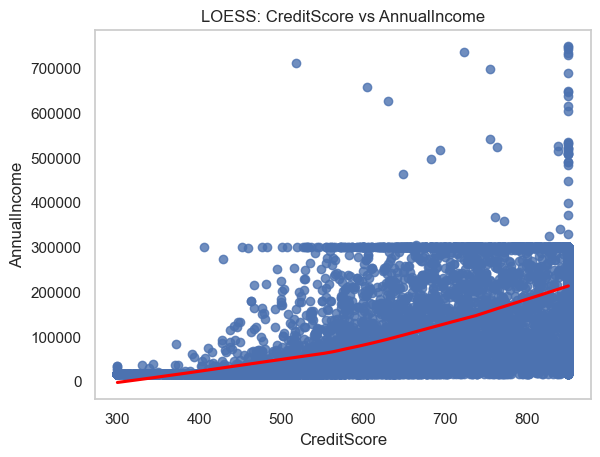

In [247]:
sns.regplot(x='CreditScore', y='AnnualIncome', data=pre_df, lowess=True, line_kws={"color": "red"})
plt.title("LOESS: CreditScore vs AnnualIncome")
plt.grid()
plt.show()


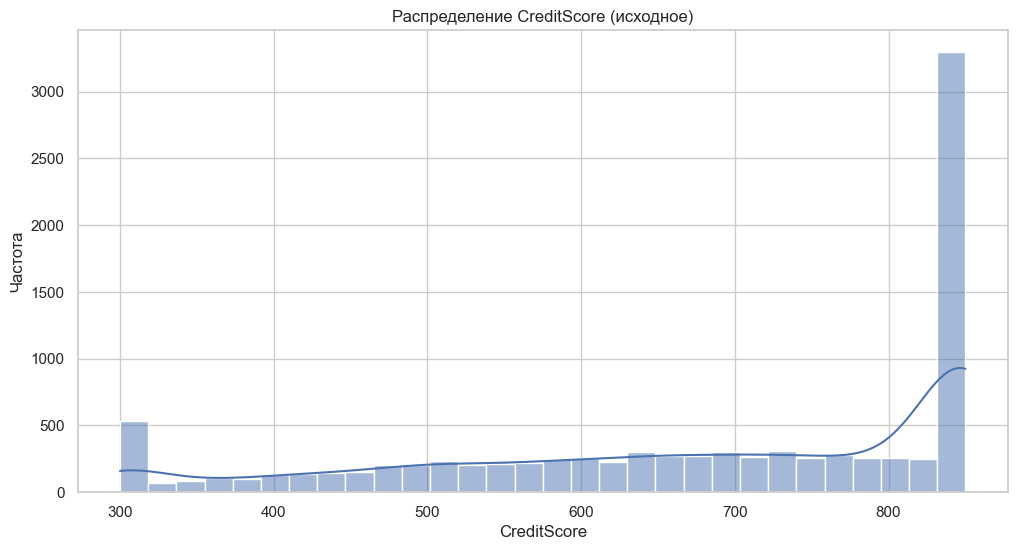

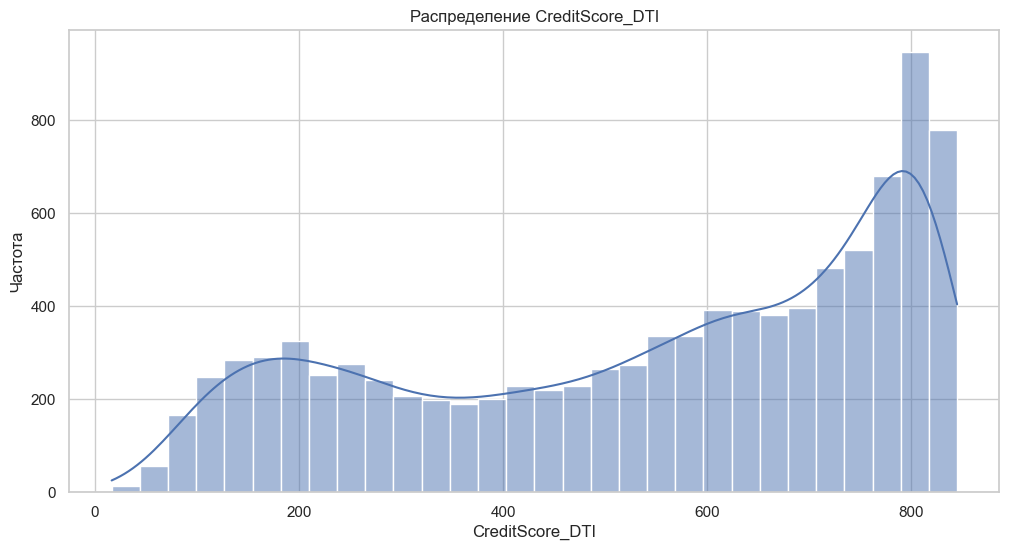

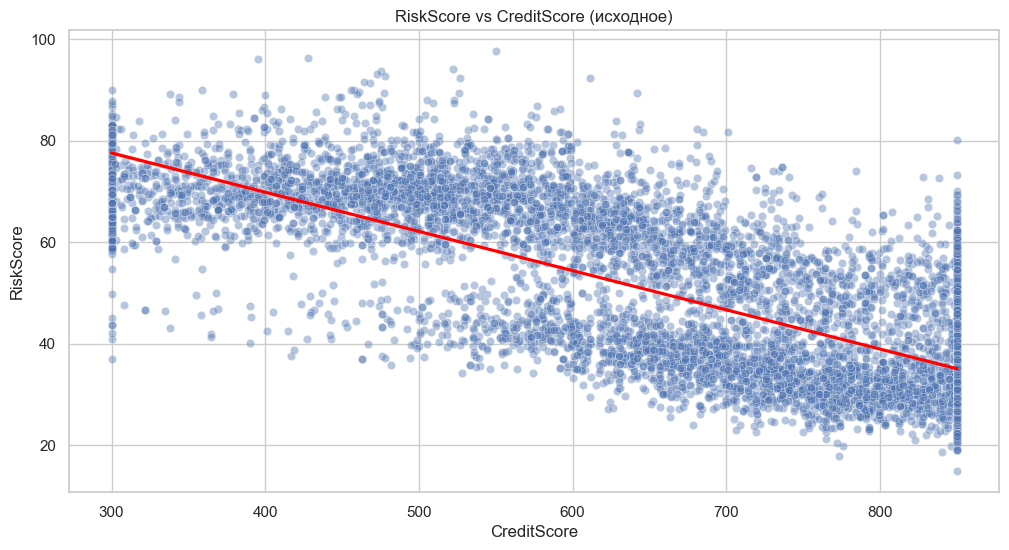

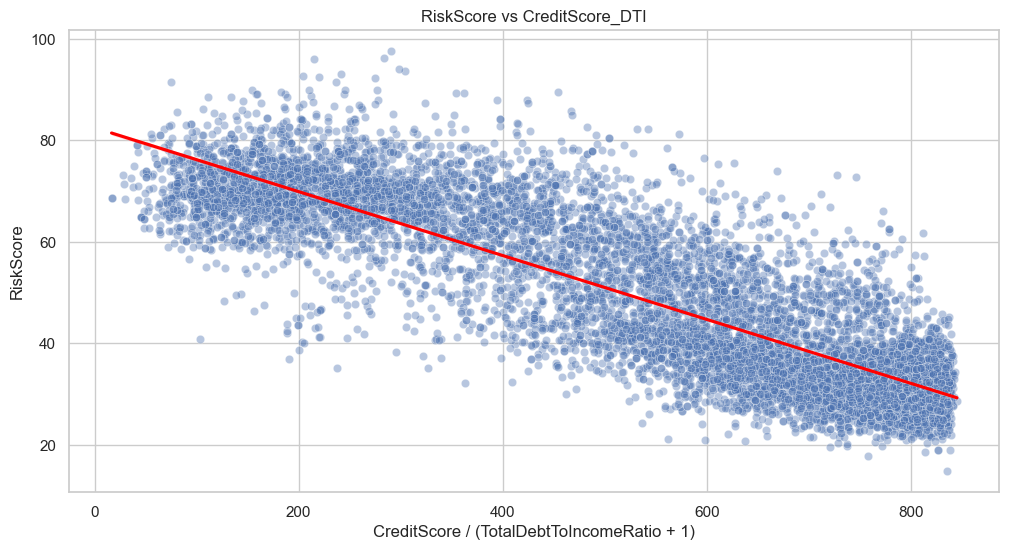

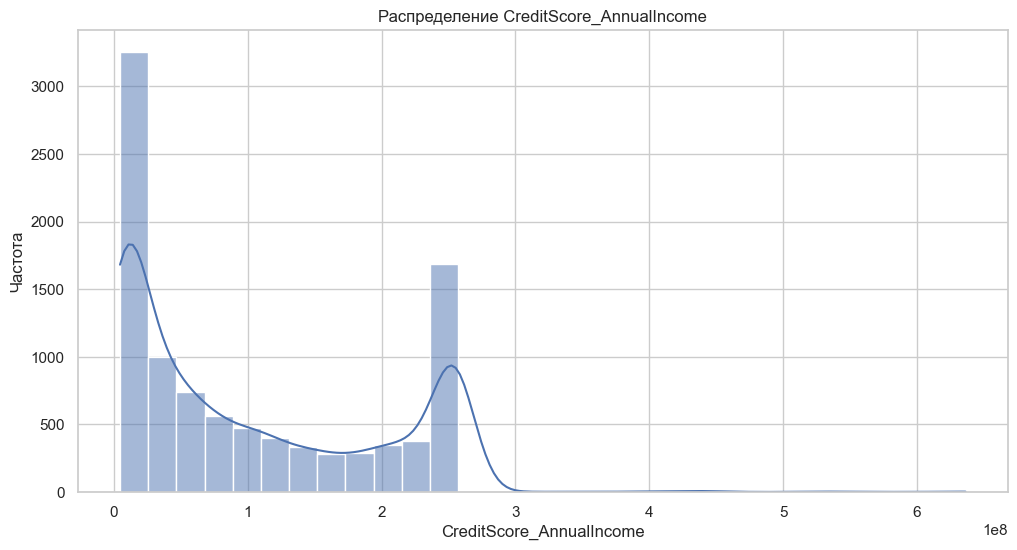

In [248]:
plt.figure(figsize=(12, 6))
sns.histplot(pre_df['CreditScore'], bins=30, kde=True)
plt.title("Распределение CreditScore (исходное)")
plt.xlabel("CreditScore")
plt.ylabel("Частота")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(pre_df['CreditScore_DTI'], bins=30, kde=True)
plt.title("Распределение CreditScore_DTI")
plt.xlabel("CreditScore_DTI")
plt.ylabel("Частота")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pre_df['CreditScore'], y=train['RiskScore'], alpha=0.4)
sns.regplot(x=train['CreditScore'], y=train['RiskScore'], scatter=False, color='red')
plt.title("RiskScore vs CreditScore (исходное)")
plt.xlabel("CreditScore")
plt.ylabel("RiskScore")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='CreditScore_DTI', y='RiskScore', data=pre_df, alpha=0.4)
sns.regplot(x='CreditScore_DTI', y='RiskScore', data=pre_df, scatter=False, color='red')
plt.title("RiskScore vs CreditScore_DTI")
plt.xlabel("CreditScore / (TotalDebtToIncomeRatio + 1)")
plt.ylabel("RiskScore")

plt.figure(figsize=(12, 6))
sns.histplot(pre_df['CreditScore_AnnualIncome'], bins=30, kde=True)
plt.title("Распределение CreditScore_AnnualIncome")
plt.xlabel("CreditScore_AnnualIncome")
plt.ylabel("Частота")
plt.show()


### Создание признаков для модели

<Axes: ylabel='TotalDebtToIncomeRatio'>

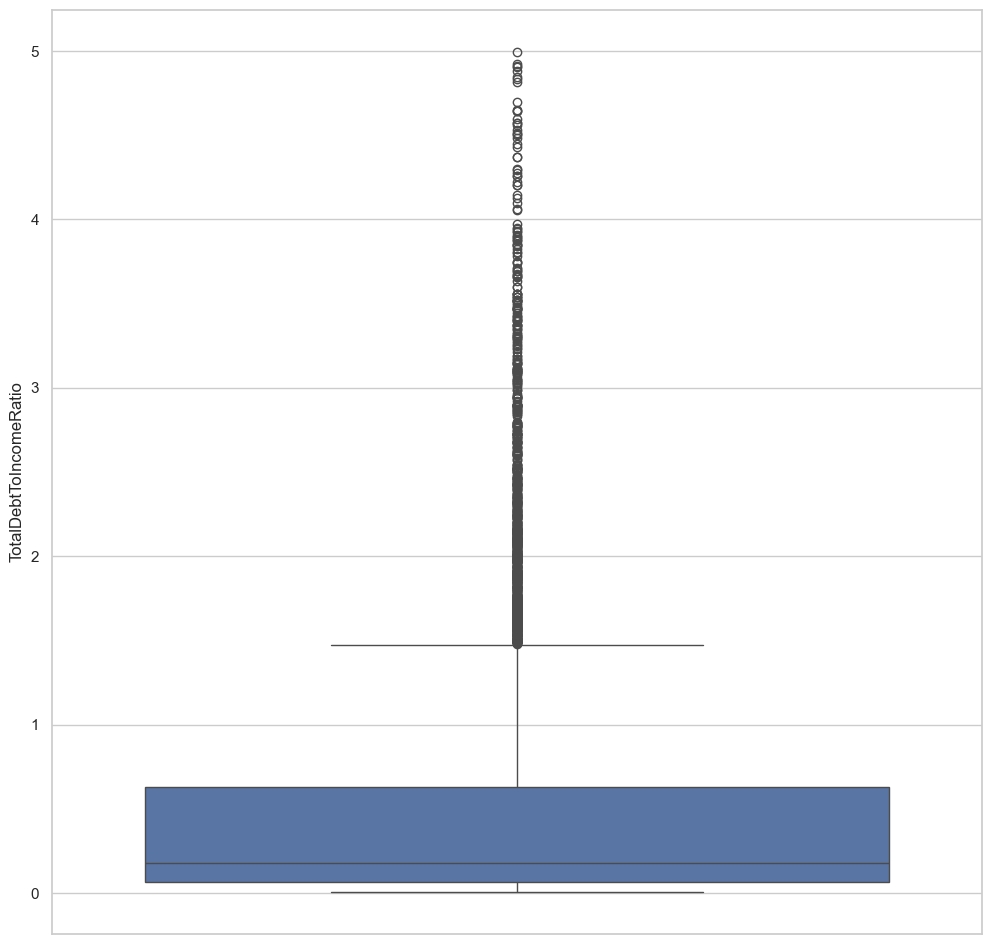

In [249]:
# Удаление выбросов
pre_df = pre_df[pre_df["TotalDebtToIncomeRatio"] < 5]

# Логарифмирование признаков
log_features = ["AnnualIncome", "MonthlyLoanPayment", "LoanAmount", "NetWorth", "TotalAssets"]
for feature in log_features:
    pre_df[f"Log_{feature}"] = np.log1p(pre_df[feature])
    pre_test[f"Log_{feature}"] = np.log1p(pre_test[feature])

for name, func in {
    "sqrt3": np.cbrt,
    "sqrt2": np.sqrt,
    "log": np.log1p
}.items():
    pre_df[f"TotalDebtToIncomeRatio_{name}"] = func(pre_df["TotalDebtToIncomeRatio"])
    pre_test[f"TotalDebtToIncomeRatio_{name}"] = func(pre_test["TotalDebtToIncomeRatio"])

# Взаимодействия
interaction_features = {
    "BaseInterestRate_AnnualIncome": ("AnnualIncome", "BaseInterestRate"),
    "CreditScore_TotalDebtToIncomeRatio": ("CreditScore", "TotalDebtToIncomeRatio"),
    "Income_LoanAmount_Interaction": ("MonthlyIncome", "LoanAmount"),
    "Log_CreditScore_TotalDebtToIncomeRatio": (lambda d: np.log1p(d["CreditScore"]), "TotalDebtToIncomeRatio"),
    "Debt_Interest_Interaction": ("TotalDebtToIncomeRatio", "InterestRate"),
}

for name, (col1, col2) in interaction_features.items():
    if callable(col1):
        pre_df[name] = col1(pre_df) * train[col2]
        pre_test[name] = col1(pre_test) * pre_test[col2]
    else:
        pre_df[name] = pre_df[col1] * pre_df[col2]
        pre_test[name] = pre_test[col1] * pre_test[col2]

plt.figure(figsize=(12, 12))
sns.boxplot(pre_df["TotalDebtToIncomeRatio"])

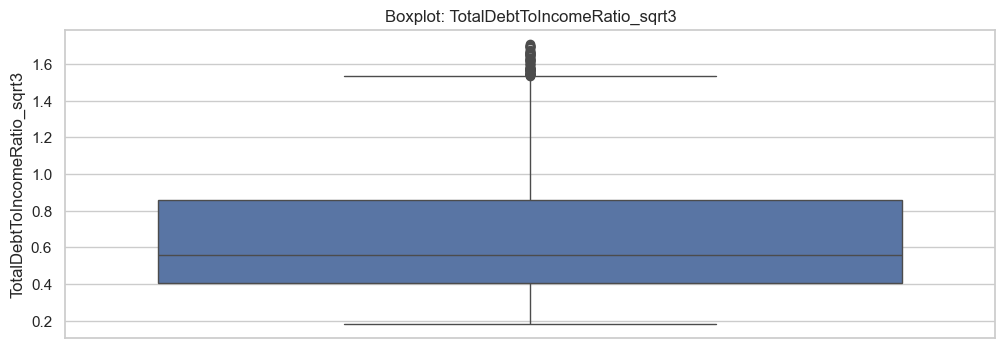

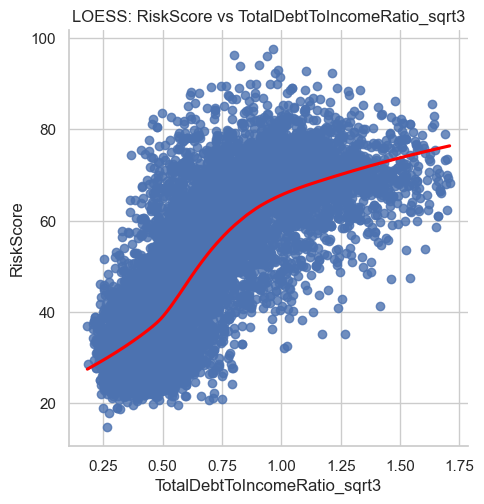

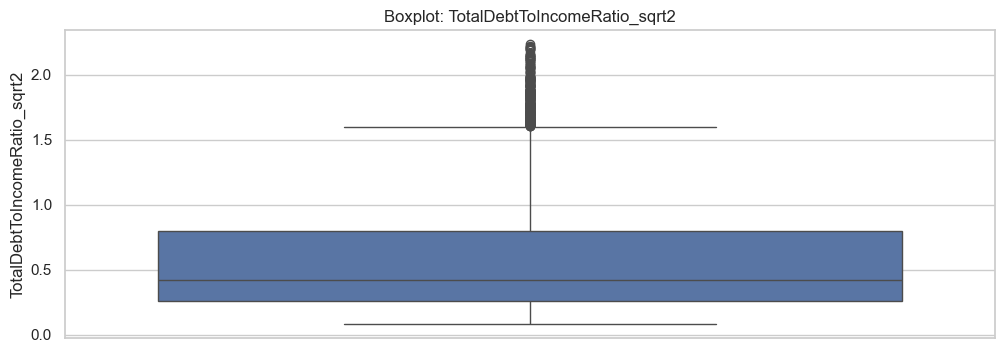

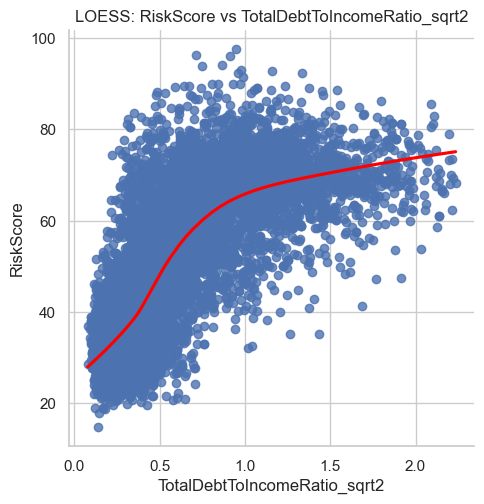

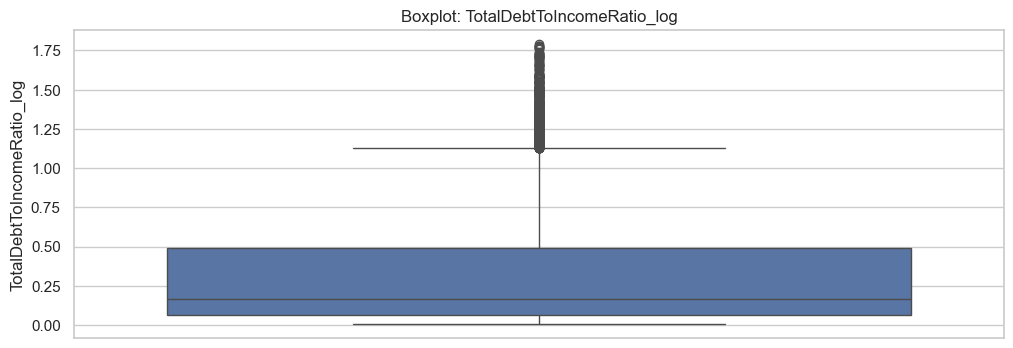

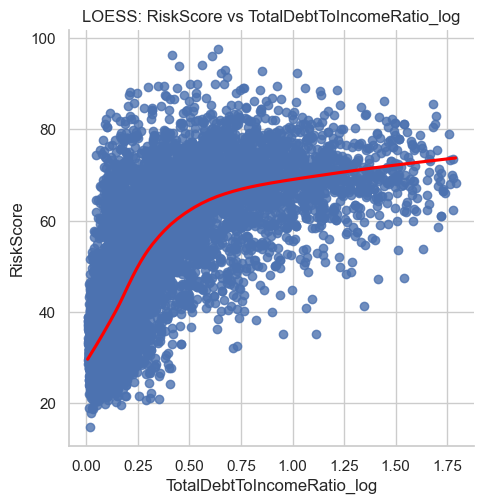

In [250]:
transformed_cols = ["TotalDebtToIncomeRatio_sqrt3", "TotalDebtToIncomeRatio_sqrt2", "TotalDebtToIncomeRatio_log"]

for col in transformed_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(pre_df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

    sns.lmplot(x=col, y="RiskScore", data=pre_df, lowess=True, line_kws={"color": "red"})
    plt.title(f"LOESS: RiskScore vs {col}")
    plt.show()


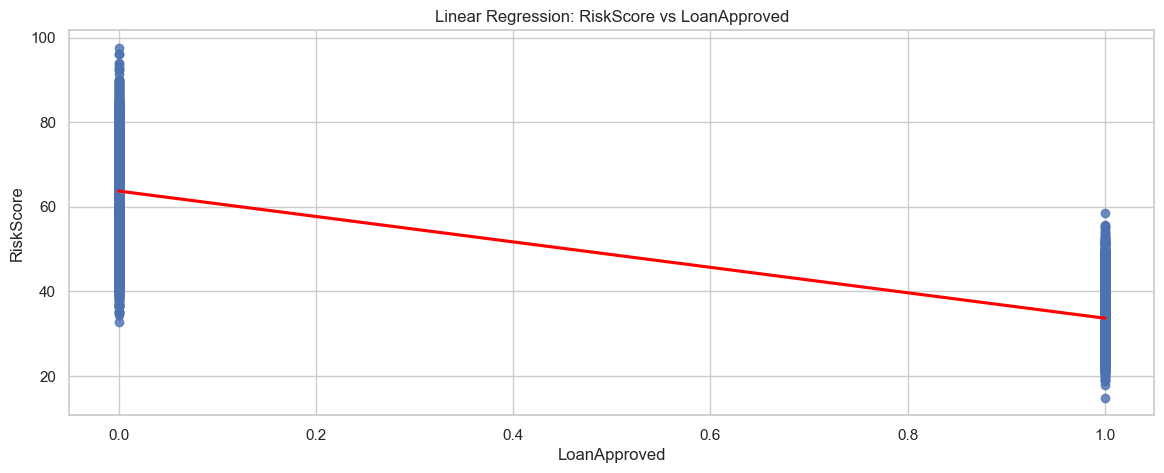

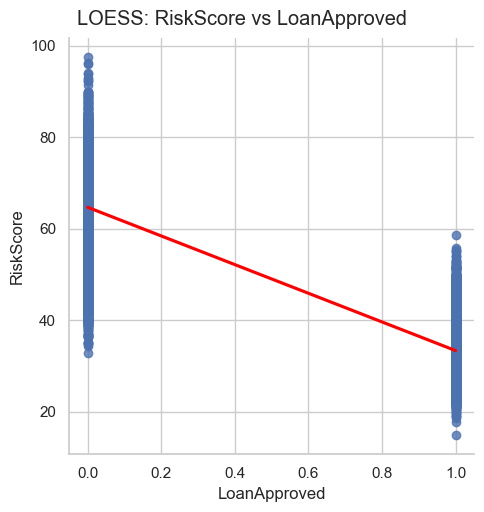

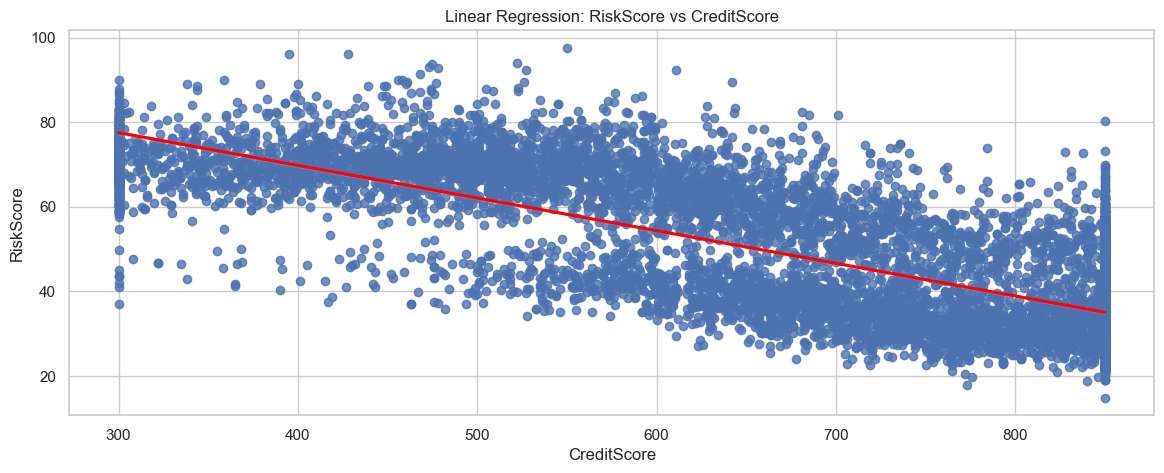

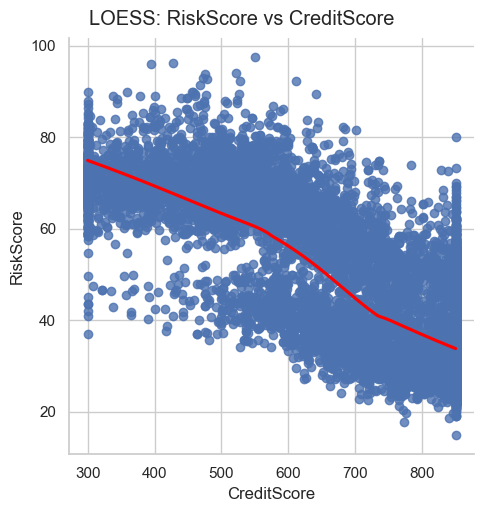

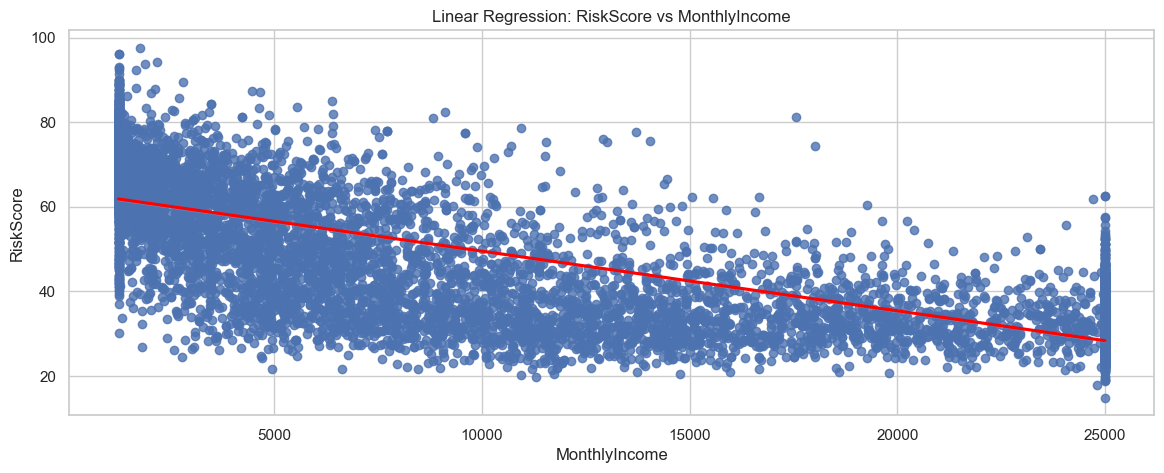

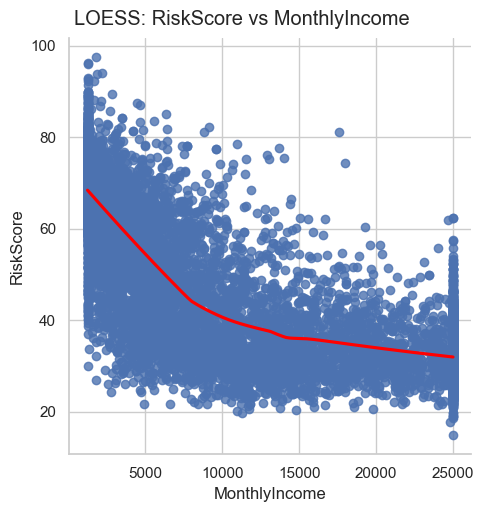

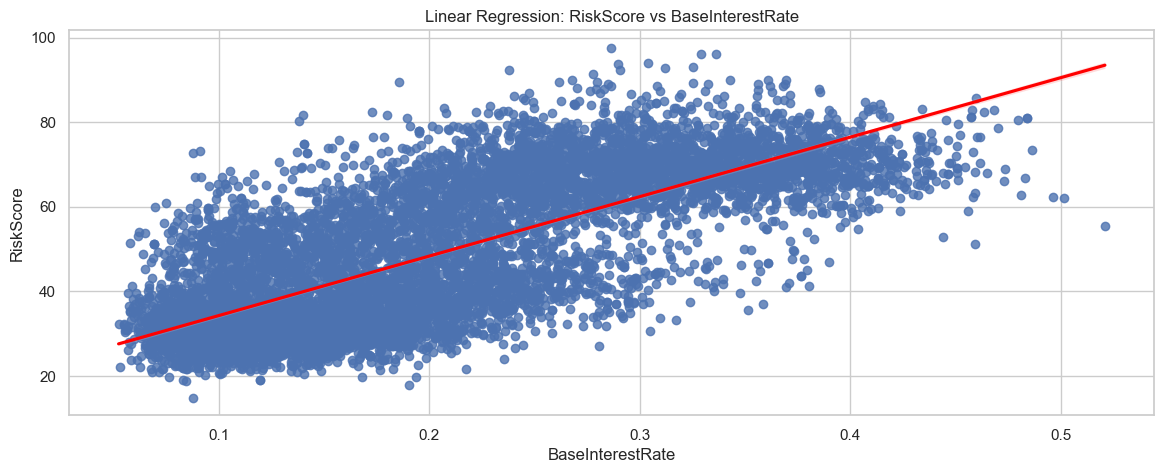

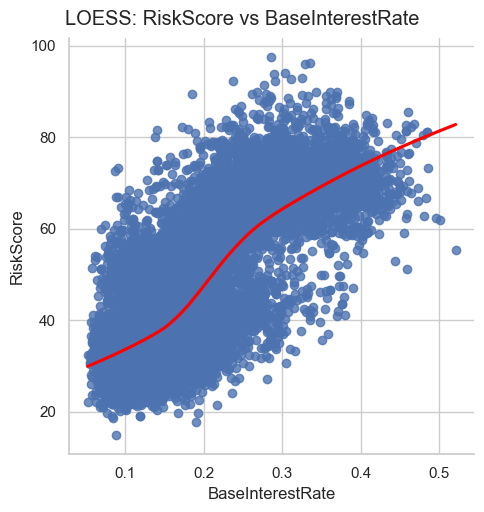

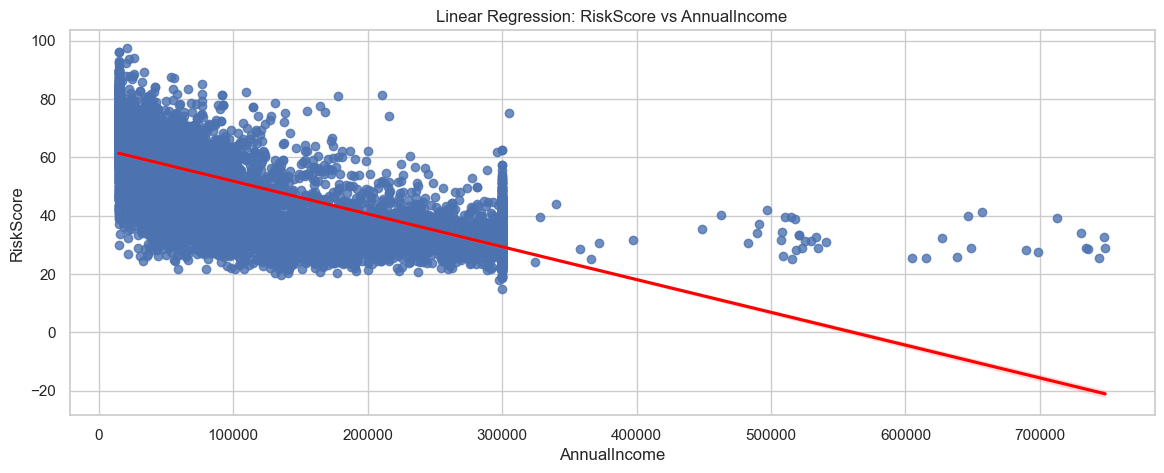

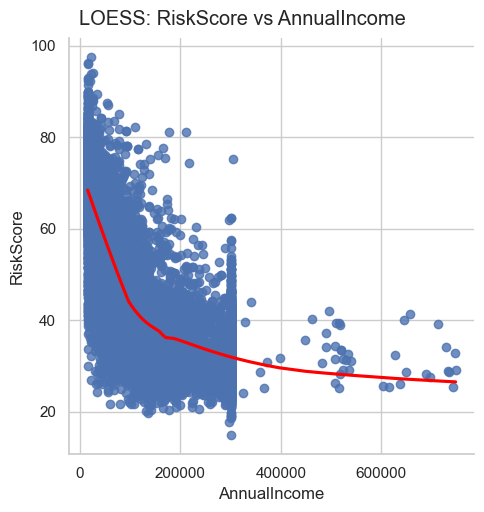

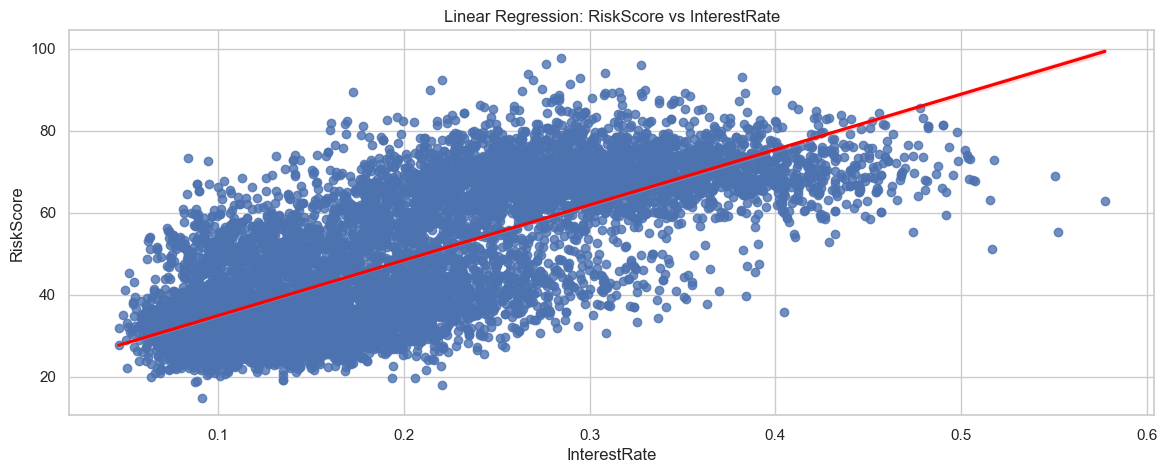

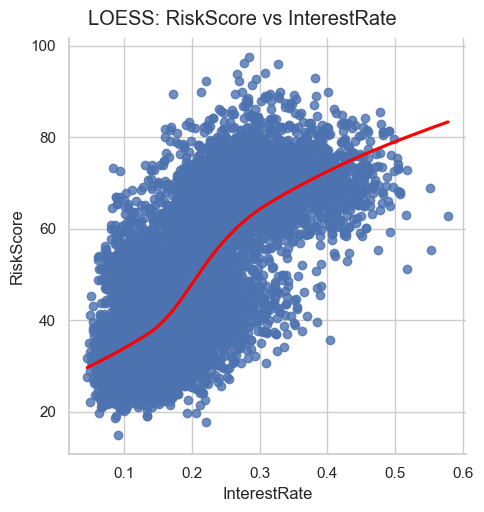

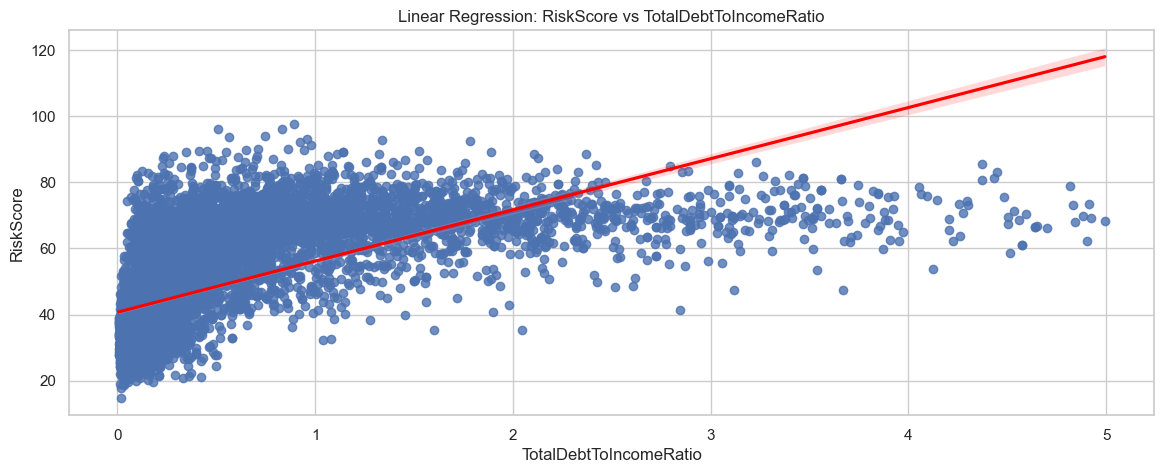

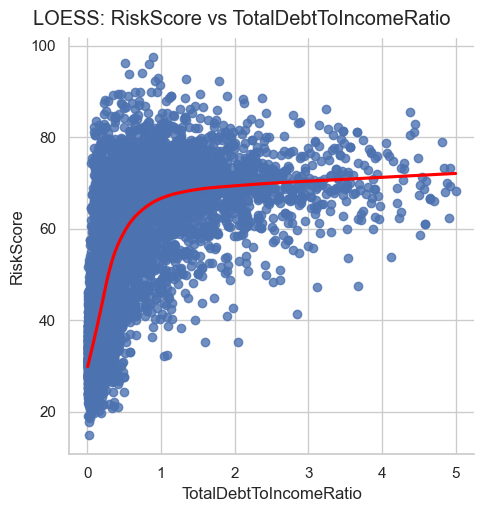

In [258]:
features = ["LoanApproved", "CreditScore", "MonthlyIncome", "BaseInterestRate", 
            "AnnualIncome", "InterestRate", "TotalDebtToIncomeRatio"]

for feature in features:
    # Глобальная линейная регрессия
    plt.figure(figsize=(14, 5))
    sns.regplot(x=pre_df[feature], y=pre_df["RiskScore"], line_kws={"color": "red"})
    plt.title(f"Linear Regression: RiskScore vs {feature}")
    plt.show()

    # Локальная регрессия (LOWESS)
    plot = sns.lmplot(x=feature, y="RiskScore", data=pre_df, lowess=True, line_kws={"color": "red"})
    plot.fig.suptitle(f"LOESS: RiskScore vs {feature}", y=1.02)
    plt.show()

### Корреляция признаков

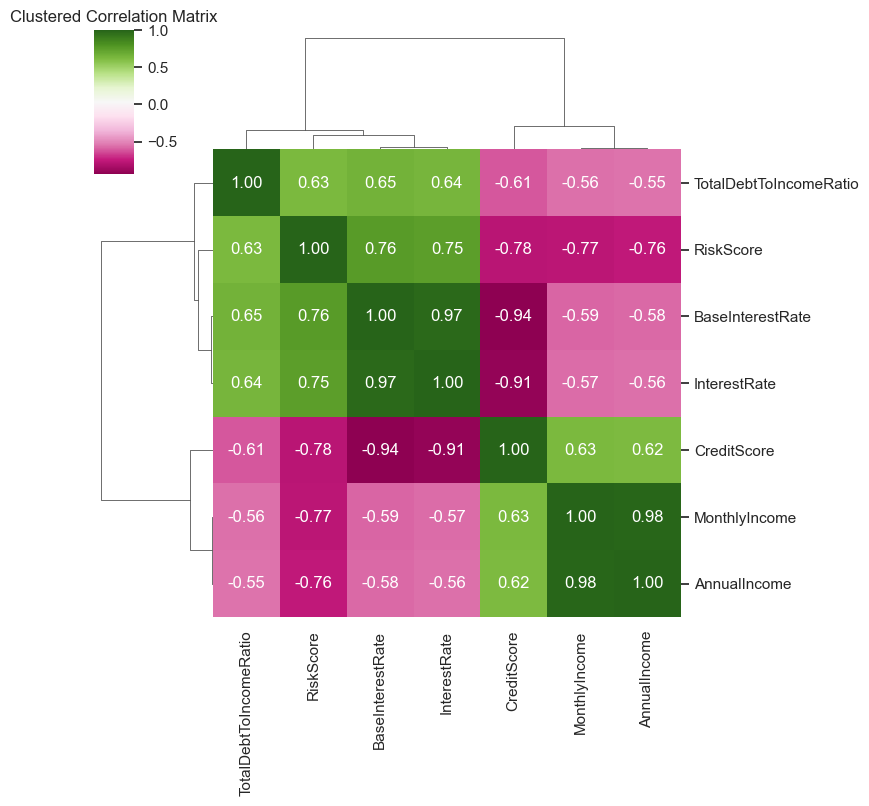

In [252]:
correlations = pre_df[["RiskScore", "CreditScore", "MonthlyIncome", "BaseInterestRate", "AnnualIncome", "InterestRate", "TotalDebtToIncomeRatio"]].corr()

sns.clustermap(correlations, annot=True, fmt=".2f", cmap="PiYG", figsize=(8, 8))
plt.title("Clustered Correlation Matrix")
plt.show()

# Нормализация данных
## Z-score нормализация

<div style="font-size: 24px; text-align: left;">

$$
z = \frac{x - \mu}{\sigma}
$$

<span style="font-size: 18px;">
$x$ — исходное значение признака, которое мы нормализуем.<br>
$\mu$ — среднее значение данного признака по всему набору данных.<br>
$\sigma$ — стандартное отклонение данного признака.
</span>

</div>

In [288]:
train_n = pre_df.select_dtypes("number").copy()
test_n = pre_test.select_dtypes("number").copy()

features = train_n.drop(columns=["RiskScore"])  
target = train_n["RiskScore"]

print(features.std().min()) 

train_mean = features.mean()
train_std = features.std().replace(0, 1)

features_z = features.apply(lambda x: (x - x.mean()) / (x.std() if x.std() > 0 else 1))

train_n_z = features_z.copy()
train_n_z["RiskScore"] = target

test_n_z = test_n.apply(lambda x: (x - x.mean()) / (x.std() if x.std() > 0 else 1))

print(train_n_z["AnnualIncome"].mean())  # 0
print(train_n_z["AnnualIncome"].std())   # 1

0.09313265260720745
2.8071724296320015e-17
1.0


## Min-Max нормализация

<div style="font-size: 24px; text-align: left;">

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

<span style="font-size: 18px;">
$x$ — исходное значение признака<br>
$x_{\min}$ — минимальное значение признака в наборе данных<br>
$x_{\max}$ — максимальное значение признака в наборе данных<br>
$x'$ — нормализованное значение в диапазоне [0, 1]
</span>

</div>

In [285]:
features_mm = features.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

features = features.astype(np.float64)
test_n = test_n.astype(np.float64)

df_mm = features_mm.copy()
df_mm["RiskScore"] = target
df_mm_test = test_n.apply(lambda x: (x - x.min()) / ((x.max() - x.min()) ))

# Теперь все значения в диапазоне от 0 до 1

print(df_mm["AnnualIncome"].max()) # 1
print(df_mm["AnnualIncome"].min()) # 0

1.0
0.0


# Реализация класса линейной регрессии
## Вывод нормального уравнения линейной регрессии

Пусть:
$$
\mathbf{y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
\quad \text{— вектор целевых значений,}
$$

$$
\mathbf{X} = 
\begin{bmatrix}
1 & x_{11} & \cdots & x_{1p} \\
1 & x_{21} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \cdots & x_{np}
\end{bmatrix}
\quad \text{— матрица признаков с единичным столбцом для свободного члена.}
$$

Модель линейной регрессии задаётся как

$$
\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\theta},
$$

где 
$$
\boldsymbol{\theta} = 
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_p
\end{bmatrix}
\quad \text{— вектор параметров модели.}
$$

---

Функция потерь (MSE) равна

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} (\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\theta}).
$$

---

Чтобы минимизировать $J(\boldsymbol{\theta})$, берём градиент по $\boldsymbol{\theta}$ и приравниваем к нулю:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = -\frac{1}{n}\mathbf{X}^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\theta}) = 0,
$$

откуда

$$
\mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X} \boldsymbol{\theta}.
$$

---

Решая это уравнение относительно $\boldsymbol{\theta}$, получаем нормальное уравнение:

$$
\boxed{
\hat{\boldsymbol{\theta}} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}.
}
$$


## Вывод градиентного спуска

### Функция потерь (MSE)

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} (\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\theta}).
$$

## Шаги вычисления градиента
### 1. Раскрываем квадрат нормы

$$
J(\boldsymbol{\theta}) = \frac{1}{2n} (\theta^\top X^\top X\theta - 2\theta^\top X^\top y + y^\top y)
$$

### 2. Дифференцируем по $\theta$

> **1. Производная квадратичной формы:**

$$
\frac{\partial}{\partial\theta} \left(\theta^\top X^\top X\mathbf{\theta} \right) = 2 X^\top X \mathbf{\theta}
$$

> **2. Производная линейного члена:**

$$
\frac{\partial}{\partial \mathbf{\theta}} (-2\mathbf{\theta}^\top X^\top \mathbf{y}) = -2X^\top \mathbf{y}
$$


> **3. Производная константы:**

$$
\frac{\partial}{\partial \mathbf{\theta}} (\mathbf{y}^\top \mathbf{y}) = 0
$$

### 3. Собираем все компоненты
$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{2n} (2 X^\top X \mathbf{\theta} - 2X^\top \mathbf{y})
$$

---

## Итоговая формула градиента
$$
\boxed{
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{n} X^\top (X\mathbf{\theta} - \mathbf{y})
}
$$

Градиент показывает направление наискорейшего роста функции потерь. Отрицательный градиент ($ \nabla_{\boldsymbol{}}J$) указывает направление минимизации ошибки. Формула используется в градиентном спуске для обновления весов:
$$
\theta_{j} = \theta_{j-1} - \alpha \cdot\nabla_{\boldsymbol{\theta}}J(\boldsymbol{\theta})
$$
где $\alpha$ - скорость обучения

In [313]:
import numpy as np

class LinearRegression:
    def __init__(self, method="analytical", learning_rate=0.01, iter=1e4) :
        self.method = method
        self.learning_rate = learning_rate # нужна для корректировки узнать какой
        self.iter = int(iter)
        self.weights = None

    def add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]
    
    def fit(self, X, y):
        # Добавляем единичный столбец
        X = self.add_bias(X)
        m = X.shape[0] # кол-во объектов
        n = X.shape[1] # кол-во признаков

        
        if self.method == "analytical":
            self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y
            
        elif self.method == "gradient":
            self.weights = np.zeros(n)
            for i in range(self.iter):
                gradient = (1 / m) * (X.T @ (X @ self.weights - y)) 
                self.weights -= self.learning_rate * gradient
                
        elif self.method == "sgradient":
            self.weights = np.zeros(n)
            for epoch in range(self.iter):
                indices = np.arange(m)
                np.random.shuffle(indices)
                for i in indices:
                    xi = X[i:i+1]  
                    yi = y[i]      
                    gradient = xi.T * (xi @ self.weights - yi)
                    self.weights -= self.learning_rate * gradient.flatten()
        else:
            raise ValueError("Метод должен быть 'analytical', 'gradient' или 'sgradient'")


    def predict(self, X):
        X = self.add_bias(X)
        return X @ self.weights

In [289]:
print("Число признаков в X_train:", train_n_z.shape[1])
print("Число признаков в X_test:", test_n_z.shape[1])

Число признаков в X_train: 62
Число признаков в X_test: 62


In [299]:
from sklearn.metrics import mean_squared_error

def mse(y_real, y_pred):
    return ((y_real - y_pred) ** 2).mean()

X = train_n_z.drop("RiskScore", axis=1).values
X_test = test_n_z.drop(columns=['ID']).values
y = train_n_z["RiskScore"].values 

model1 = LinearRegression(method="analytical")
model1.fit(X, y)
predictions1 = model1.predict(X)
mse1 = mse(predictions1, y)
smse1 = mean_squared_error(predictions1, y)

model2 = LinearRegression(method="gradient", learning_rate=0.01, iter=1e4)
model2.fit(X, y)
predictions2 = model2.predict(X)
mse2 = mse(predictions2, y)
smse2 = mean_squared_error(predictions2, y)

model3 = LinearRegression(method="sgradient", learning_rate=0.001, iter=300)
model3.fit(X, y)
predictions3 = model3.predict(X)
mse3 = mse(predictions3, y)
smse3 = mean_squared_error(predictions3, y)

print("MSE (Analytical):")
print("My ", mse1)
print("Sklearn ", smse1, "\n")

print("MSE (Gradient):")
print("My ", mse2)
print("Sklearn ", smse2, "\n")

print("MSE (Stochastic):")
print("My ", mse3)
print("Sklearn ", smse3)
 
submission_df = pd.DataFrame({
    "ID": test_ids,
    "RiskScore": model3.predict(X_test)
})

submission_df.to_csv("kaggle_submission.csv", index=False)

MSE (Analytical):
My  10.356788992748733
Sklearn  10.356788992748733 

MSE (Gradient):
My  11.493061078305102
Sklearn  11.493061078305102 

MSE (Stochastic):
My  11.468551513973745
Sklearn  11.468551513973745


In [304]:
from sklearn.metrics import mean_absolute_error

def mae (y_real, y_pred) :
    return np.mean(np.abs(y_real - y_pred))
    
mae1 = mae(predictions1, y)
smae1 = mean_absolute_error(predictions1, y)

mae2 = mae(predictions2, y)
smae2 = mean_absolute_error(predictions2, y)

mae3 = mae(predictions3, y)
smae3 = mean_absolute_error(predictions3, y)

print("MAE (Analytical):")
print("My :", mae1)
print("sklearn :", smae1, "\n")

print("MAE (Gradient):")
print("My :", mae2)
print("sklearn :", smae2, "\n")

print("MAE (Stochastic):")
print("My ", mae3)
print("sklearn :", smae3)

MAE (Analytical):
My : 2.525231241693443
sklearn : 2.525231241693443 

MAE (Gradient):
My : 2.6664296525283873
sklearn : 2.6664296525283873 

MAE (Stochastic):
My  2.6640574246093403
sklearn : 2.6640574246093403


## MAPE (Mean Absolute Percentage Error)

In [305]:
from sklearn.metrics import mean_absolute_percentage_error

def mape(y_real, y_pred) :
    return np.mean(np.abs((y_real - y_pred) / y_real)) * 100

mape1 = mape(predictions1, y)
smape1 = mean_absolute_percentage_error(predictions1, y)

mape2 = mape(predictions2, y)
smape2 = mean_absolute_percentage_error(predictions2, y)

mape3 = mape(predictions3, y)
smape3 = mean_absolute_percentage_error(predictions3, y)

print("MAPE (Analytical):")
print("My :", mape1)
print("sklearn :", smape1 * 100, "\n")

print("MAPE (Gradient):")
print("My :", mape2)
print("sklearn :", smape2 * 100, "\n")

print("MAPE (Stochastic):")
print("My :", mape3)
print("sklearn :", smape3 * 100)


MAPE (Analytical):
My : 5.836912772005355
sklearn : 5.836912772005355 

MAPE (Gradient):
My : 6.149011410167862
sklearn : 6.149011410167862 

MAPE (Stochastic):
My : 6.131446518060398
sklearn : 6.131446518060398


In [306]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X, y)  

submission_df = pd.DataFrame({
    "ID": test_ids,
    "RiskScore": sklearn_model.predict(X_test) 
})

submission_df.to_csv("kaggle_submission.csv", index=False)

## Кросс-валидация k-fold

In [309]:
def k_fold(model_c, X, y, k=5, **model_params):
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    mse_scores = []

    for i in range(k):
        start_indx = i * fold_size
        end_indx = (i + 1) * fold_size if i != k - 1 else len(X)

        test_idx = indices[start_indx:end_indx]
        train_idx = np.concatenate([indices[:start_indx], indices[end_indx:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Создаём новую модель на каждой итерации
        model = model_c(**model_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = np.mean((y_pred - y_test) ** 2)
        mse_scores.append(mse)

    return np.mean(mse_scores)

In [315]:
mse_kfold = k_fold(LinearRegression, X, y, k=5, method="gradient", learning_rate=0.01, iter=10000)
print(f"K-Fold MSE (k=5): {mse_kfold:.4f}")

K-Fold MSE (k=5): 11.6511


## Leave-One-Out Cross-Validation (LOO или LOO-CV)

In [316]:
def loo(model_c, X, y, **model_params):
    n = len(X)
    mse_scores = []

    for i in range(n):
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        X_test = X[i:i+1]
        y_real = y[i]

        model = model_c(**model_params)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)[0]

        mse_scores.append((y_pred - y_real) ** 2)

    return np.mean(mse_scores)

In [317]:
mse_loo = loo(LinearRegression, X, y, method="gradient", learning_rate=0.01, iter=10)
print(f"LOO MSE : {mse_loo:.4f}")

LOO MSE : 1971.7619


## Регуляризация

### Регуляризация нужна, чтобы:
> 1. Бороться с переобучением – ограничивает сложность модели, предотвращая запоминание шума.
>
> 2. Улучшать обобщение – помогает модели лучше работать на новых данных.
>
> 3. Решать мультиколлинеарность – стабилизирует веса при коррелированных признаках.

### L2-регуляризация (Ridge)
$$
L(\theta) = \text{MSE}(\theta) + \lambda \sum_{i=1}^{n} \theta_i^2
$$

### Исходная функция потерь
$$
L(\theta) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \frac{\lambda}{2}\sum_{i=1}^{n}\theta_i^2
$$
где:

- $\hat{y}_i = X_i\theta$ -  предсказание модели,
- $\lambda$ - коэффициент регуляризации,
- $\theta$ - вектор параметров модели

### Вывод нормального уравнения с регуляризацией

- **1. Матричная запись функции потерь:**

$$
J(\theta) = \frac{1}{2n} (X\theta - y)^\top (X\theta - y) + \frac{\lambda}{2} \theta^\top \theta
$$

- **2. Вычисление градиента:**

$$
\frac{\partial \mathcal{L}}{\partial \theta} = \frac{1}{n} X^T (X\theta - y) + \lambda \theta
$$

- **3. Приравнивание градиента к нулю и решение уравнения:**

Для нахождения минимума:

$$
\frac{1}{n} X^T (X\theta - y) + \lambda \theta = 0
$$

Умножим обе части на \( n \):

$$
X^T X\theta - X^T y + n\lambda \theta = 0
$$

Приведем к нормальному виду:

$$
(X^T X + n\lambda I) \theta = X^T y
$$

Откуда:

$$
\theta = (X^T X + n\lambda I)^{-1} X^T y
$$

Пусть $\lambda' = n\cdot\lambda$
Тогда:
$$
\theta = (X^T X + \lambda' I)^{-1} X^T y
$$

### L1-регуляризация (Lasso) - имеет свойство делать веса разрежёнными – многие веса становятся равными нулю

Оставляем только важные признаки.
$$
L(\theta) = \text{MSE} + \lambda\sum_{j=1}^n|\theta_j|
$$

Функция потерь с L1-регуляризацией:

$$
L(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{m} |\theta_j|
$$

<div align="center">
MSE ⟶ среднеквадратичная ошибка   L1-штраф ⟶ регуляризация
</div>

где:
- $ \hat{y}_i = X_i \theta $ — предсказание модели,  
- $ \lambda $ — коэффициент регуляризации,  
- $ \theta_j $ — веса модели.
---

## Шаг 1. Матричная запись

Перепишем в матричной форме:

$$
L(\theta) = \frac{1}{2n} ||y - X\theta||^2 + \lambda ||\theta||_1
$$

$||\theta||_1 $ — Манхэттенское расстояние. Для вектора представляет собой сумму модулей всех его элементов.

---

## Шаг 2. Градиент

Функция $ |\theta_j|$ **не дифференцируема** в точке $ \theta_j = 0$. Используем:

$$
\text{sign}(\theta_j) = \frac{\partial |\theta_j|}{\partial \theta_j} =
\begin{cases}
1, & \theta_j > 0 \\\\
-1, & \theta_j < 0 \\\\
0, & \theta_j = 0
\end{cases}
$$

**Общий градиент функции потерь с L1**:
$$
\frac{\partial L}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^n X_{ij}(\hat{y}_i - y_i) + \lambda \cdot \text{sign}(\theta_j)
$$

---

## L1 + L2 регуляризация (Elastic Net)

### Комбинированный штраф
$$
L(\theta) = \text{MSE} + \lambda_1 \sum_{j=1}^n |\theta_j| + \lambda_2 \sum_{j=1}^n \theta_j^2
$$

### Преимущества Elastic Net

| Ситуация | L1 (Lasso) | L2 (Ridge) | Elastic Net |
|----------|-----------|-----------|-------------|
| **Коррелированные признаки** | Выбирает один случайный | Сохраняет все | Группирует коррелированные |
| **Отбор признаков** | Да | Нет | Частично |
| **Устойчивость** | Чувствителен к выбросам | Робастный | Баланс |

---

## Особенности регуляризации при разных значениях p

### 1. p = 1 (L1-регуляризация)
**Градиент регуляризации**:  
$$\lambda \cdot \text{sign}(\theta_j)$$

**Эффект**:  
- Обнуление некоторых весов (создание разреженных решений)
- Выполняет отбор признаков

### 2. p = 2 (L2-регуляризация) 
**Градиент регуляризации**:  
$$\lambda \cdot \theta_j$$

**Эффект**:  
- Равномерное сокращение всех весов
- Стабилизирует решение при мультиколлинеарности

### 3. 0 < p < 1 (Суб-L1 регуляризация)
**Градиент регуляризации**:  
$$\lambda \cdot p \cdot |\theta_j|^{p-1} \cdot \text{sign}(\theta_j)$$

**Особенности**:  
- Функция не выпукла (сложная оптимизация)
- Сильнее обнуляет малые веса, чем L1
- Чем меньше p, тем агрессивнее зануление

### 4. p > 2 (Сверх-L2 регуляризация)
**Пример для p=3**:  
$$\lambda \cdot 3\theta_j^2 \cdot \text{sign}(\theta_j)$$

**Эффект**:  
- Более сильное штрафование больших весов по сравнению с L2
- Подавляет выбросы в значениях весов

---

### Сравнительная таблица

| Тип        | p   | Выпуклость | Градиент                          | Основной эффект               |
|------------|-----|------------|-----------------------------------|-------------------------------|
| **L1**     | 1   | Да         | $\lambda \cdot \text{sign}(\theta_j)$  | Разреженность, отбор признаков |
| **L2**     | 2   | Да         | $\lambda \cdot \theta_j$               | Уменьшение всех весов         |
| **Суб-L1** | 0<p<1 | Нет      | $\lambda p |\theta_j|^{p-1}\text{sign}(\theta_j)$ | Агрессивное зануление         |
| **Сверх-L2**| p>2 | Да        | $\lambda p \theta_j^{p-1}\text{sign}(\theta_j)$ | Сильное подавление больших весов |




In [318]:
import numpy as np

class LinearRegressionL:
    def __init__(self, method="analytical", learning_rate=0.01, iter=1e4, regularization=None, lambda_=0.0, p=2) :
        self.method = method
        self.learning_rate = learning_rate # нужна для корректировки узнать какой
        self.iter = int(iter)
        self.weights = None
        self.regularization = regularization
        self.lambda_ = lambda_
        self.p = p

    def add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]
    
    def fit(self, X, y):
        # Добавляем единичный столбец
        X = self.add_bias(X)
        m = X.shape[0] # кол-во объектов
        n = X.shape[1] # кол-во признаков

        
        if self.method == "analytical":
            if self.regularization is None:
                self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
                
            elif self.regularization == "L2":
                I = np.eye(n)
                I[0, 0] = 0  # первый вес не штрафуется (тк он не связан с признаками и отвечает только за смещение)
                self.weights = np.linalg.pinv(X.T @ X + self.lambda_ * I) @ X.T @ y
            else:
                raise ValueError("Аналитический метод поддерживает только отсутствие регуляризации или L2.")

            
        elif self.method == "gradient": #  обновляем веса после обработки всей выборки
            
            # Для начала инициализируем вектор весов нулями. ГС быстро исправит ошибки
            self.weights = np.zeros(n)

            for i in range(self.iter):
                gradient = (1 / m) * (X.T @ (X @ self.weights - y)) # X @ self.weights - это наше предсказание, а y - это реальное значение
                
                if self.regularization == "L2":
                    l_grad = self.lambda_ * self.weights
                    l_grad[0] = 0 # bias не штрафуем
                    gradient += l_grad
                elif self.regularization == "L1":
                    l_grad = self.lambda_ * np.sign(self.weights)
                    l_grad[0] = 0 # bias не штрафуем
                    gradient += l_grad
                elif self.regularization == "ElasticNet":
                    lambda1 = self.lambda_[0]
                    lambda2 = self.lambda_[1]
                    l_grad = lambda1 * np.sign(self.weights) + lambda2 * self.weights
                    l_grad[0] = 0 # bias не штрафуем
                    gradient += l_grad
                elif self.regularization == "Lp":
                    l_grad = self.lambda_ * self.p * (np.abs(self.weights) ** (self.p - 1)) * np.sign(self.weights)
                    l_grad[0] = 0
                    gradient += l_grad
                self.weights -= self.learning_rate * gradient # обновляем веса, так, чтобы функция потерь уменьшилась, тк градиент показывает в каком направлении изменять веса, чтобы ошибка снижалась
       
        elif self.method == "sgradient":
            # Обновляем веса для каждого примера, что может ускорить обучение для больших наборов данных
            self.weights = np.zeros(n)
            for epoch in range(self.iter):
                # Перемешиваем индексы объектов для случайного порядка
                indices = np.arange(m)
                np.random.shuffle(indices)
                for i in indices:
                    xi = X[i:i+1]  # выбираем один объект в виде строки
                    yi = y[i]      # целевое значение для объекта
                    # Вычисляем градиент для одного примера:
                    gradient = xi.T * (xi @ self.weights - yi)
                    gradient = gradient.flatten() 
                    if self.regularization == "L2":
                        l_grad = self.lambda_ * self.weights
                        l_grad[0] = 0 # bias не штрафуем
                        gradient += l_grad
                    elif self.regularization == "L1":
                        l_grad = self.lambda_ * np.sign(self.weights)
                        l_grad[0] = 0 # bias не штрафуем
                        gradient += l_grad
                    elif self.regularization == "ElasticNet":
                        lambda1 = self.lambda_[0]
                        lambda2 = self.lambda_[1]
                        l_grad = lambda1 * np.sign(self.weights) + lambda2 * self.weights
                        l_grad[0] = 0 # bias не штрафуем
                        gradient += l_grad
                    elif self.regularization == "Lp":
                        l_grad = self.lambda_ * self.p * (np.abs(self.weights) ** (self.p - 1)) * np.sign(self.weights)
                        l_grad[0] = 0
                        gradient += l_grad
                        # Обновляем веса для этого примера
                    self.weights -= self.learning_rate * gradient
        else:
            raise ValueError("Метод должен быть 'analytical', 'gradient' или 'sgradient'")


    def predict(self, X):
        X = self.add_bias(X)
        return X @ self.weights

In [319]:
from sklearn.metrics import mean_squared_error

model_custom = LinearRegressionL(method="gradient", learning_rate=0.01, iter=10000, regularization="L2", lambda_=0.01)
model_custom.fit(X, y)
pred_custom = model_custom.predict(X)

print("Custom model MSE:", mean_squared_error(y, pred_custom))

Custom model MSE: 11.744964655276528


Training model with None regularization...
Training model with L2 regularization...
Training model with L1 regularization...
Training model with ElasticNet regularization...
Training model with Lp regularization...


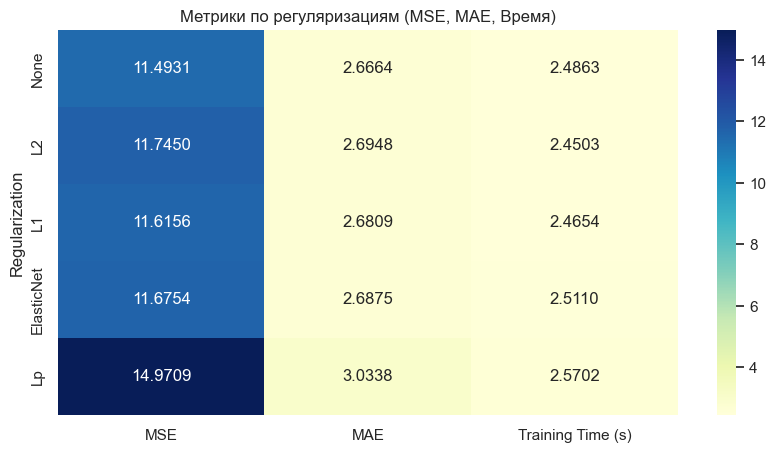

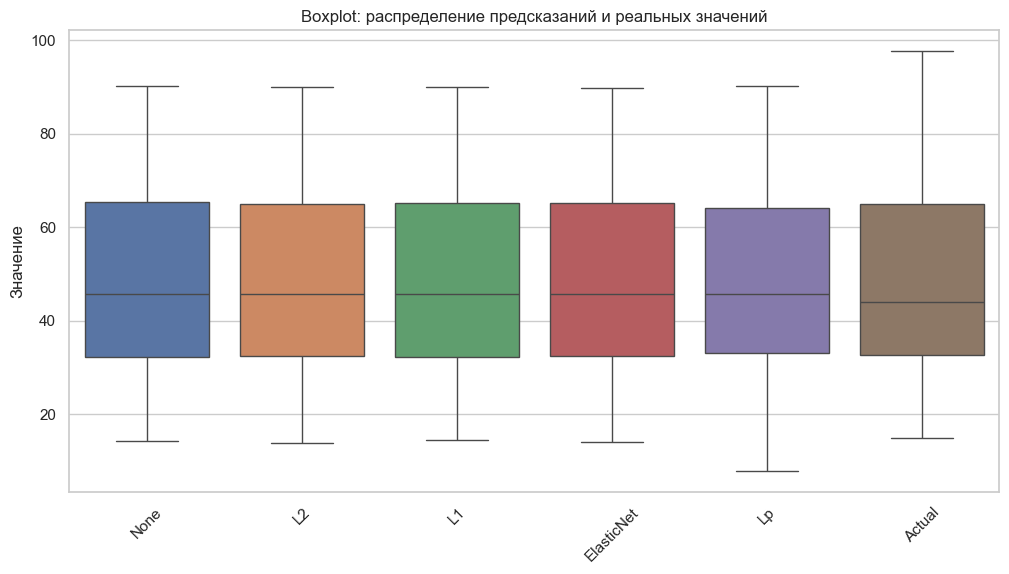

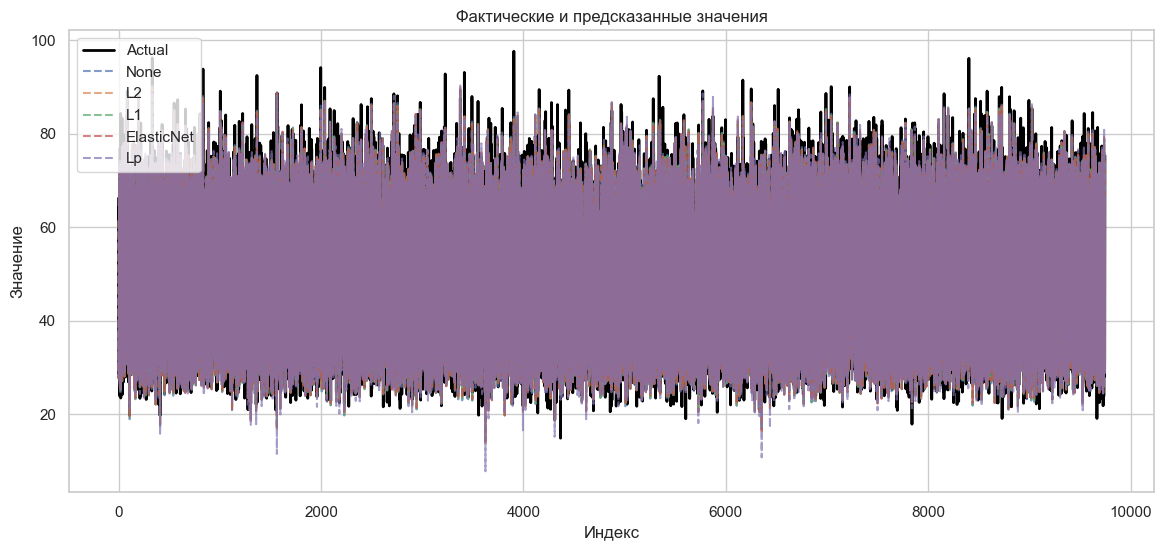

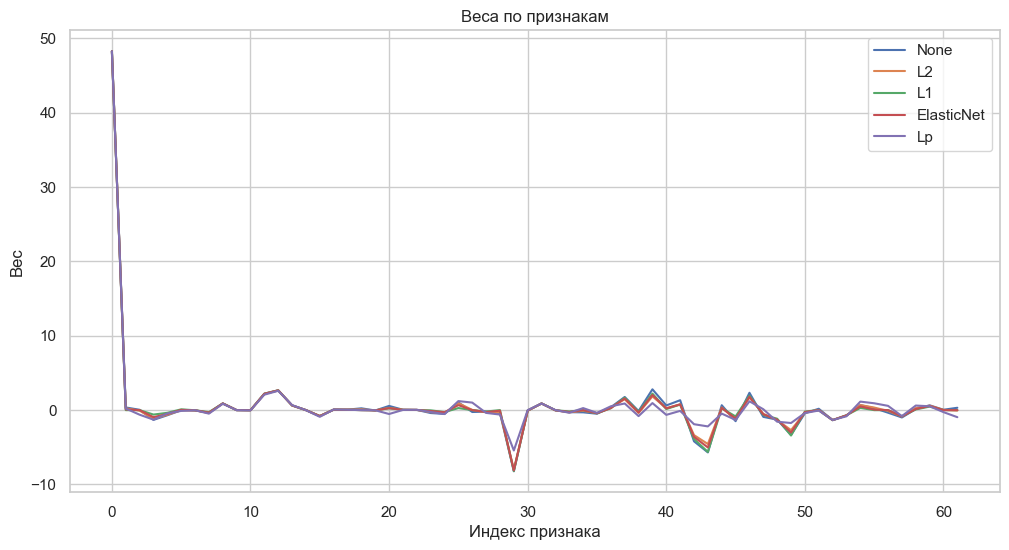

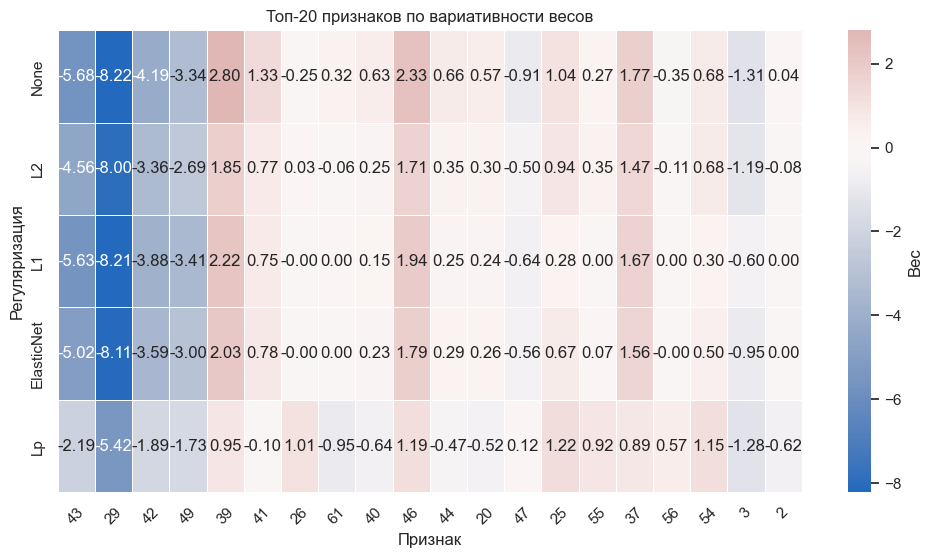

In [327]:
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

regs = [
    {"name": "None", "params": {"regularization": None}},
    {"name": "L2", "params": {"regularization": "L2", "lambda_": 0.01}},
    {"name": "L1", "params": {"regularization": "L1", "lambda_": 0.01}},
    {"name": "ElasticNet", "params": {"regularization": "ElasticNet", "lambda_": (0.005, 0.005)}},
    {"name": "Lp", "params": {"regularization": "Lp", "lambda_": 0.01, "p": 3}},
]

results = []

for reg in regs:
    print(f"Training model with {reg['name']} regularization...")
    
    model = LinearRegressionL(method="gradient", learning_rate=0.01, iter=10000, **reg["params"])
    
    start = time.time()
    model.fit(X, y)
    end = time.time()

    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    results.append({
        "name": reg["name"],
        "mse": mse,
        "mae": mae,
        "time": end - start,
        "weights": model.weights,
        "y_pred": y_pred
    })

names = [r["name"] for r in results]
mses = [r["mse"] for r in results]
maes = [r["mae"] for r in results]
times = [r["time"] for r in results]

metrics_df = pd.DataFrame({
    "Regularization": names,
    "MSE": mses,
    "MAE": maes,
    "Training Time (s)": times
}).set_index("Regularization")

plt.figure(figsize=(10, 5))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Метрики по регуляризациям (MSE, MAE, Время)")
plt.show()

# 2. Boxplot сравнения предсказаний всех моделей
plt.figure(figsize=(12, 6))
preds_df = pd.DataFrame({r["name"]: r["y_pred"] for r in results})
preds_df["Actual"] = y
sns.boxplot(data=preds_df)
plt.title("Boxplot: распределение предсказаний и реальных значений")
plt.ylabel("Значение")
plt.xticks(rotation=45)
plt.show()

# 3. Линии предсказаний всех моделей + реальные значения
plt.figure(figsize=(14, 6))
plt.plot(y, label="Actual", linewidth=2, color='black')
for r in results:
    plt.plot(r["y_pred"], label=r["name"], linestyle="--", alpha=0.7)
plt.title("Фактические и предсказанные значения")
plt.legend()
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.show()

# 4. Визуализация весов моделей
plt.figure(figsize=(12, 6))
for r in results:
    sns.lineplot(x=range(len(r["weights"])), y=r["weights"], label=r["name"])
plt.title("Веса по признакам")
plt.xlabel("Индекс признака")
plt.ylabel("Вес")
plt.legend()
plt.show()

# Выбираем топ-20 признаков с максимальной дисперсией весов
top_features = weights_df.std(axis=1).sort_values(ascending=False).head(20).index

plt.figure(figsize=(12, 6))
sns.heatmap(weights_df.loc[top_features].T, 
            cmap="vlag", center=0, annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"label": "Вес"})
plt.title("Топ-20 признаков по вариативности весов")
plt.xlabel("Признак")
plt.ylabel("Регуляризация")
plt.xticks(rotation=45)
plt.show()

# Выводы
Модель без регуляризации показала наилучшие значения MSE и MAE, но это связано с тем, что она слишком точно подстраивается под обучающие данные, включая шум. Это указывает на переобучение и слабую способность к обобщению.

### Добавление регуляризации улучшает устойчивость модели:

- L2 (Ridge) слегка ухудшает метрики, но делает модель более стабильной за счёт равномерного уменьшения весов.

- L1 (Lasso) даёт сравнимое качество, при этом автоматически отбирает наиболее значимые признаки, зануляя остальные.

- ElasticNet комбинирует подходы L1 и L2, обеспечивая баланс между снижением весов и отбором признаков.

- Lp-регуляризация с p=3 показала худшие результаты: метрики ухудшились, а веса стали нестабильными, что указывает на неудачный выбор параметра p.

С точки зрения скорости обучения, модель без регуляризации обучается дольше всех, в то время как модели с регуляризацией сходятся быстрее.

По предсказаниям: без регуляризации модель слишком точно следует за исходными данными, включая шум. Регуляризация сглаживает предсказания, повышая их устойчивость и способность к обобщению.

### Анализ весов подтверждает эти наблюдения:

- Без регуляризации модель присваивает вес почти каждому признаку.

- L2 уменьшает веса, не обнуляя их.

- L1 делает более агрессивный отбор, зануляя часть признаков.

- ElasticNet находит баланс между этими стратегиями.

- Lp с p=3 приводит к неустойчивому распределению весов.